# Data Visualisation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [4]:
# Read clean  dataset
import os


# Set up directory
os.chdir("/home/siti/Downloads/New NHS Data")

df = pd.read_csv('AE_Synthetic_Data_Final_V02.csv')

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12722216 entries, 0 to 12722215
Data columns (total 13 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   IMD_Category           object
 1   Age_Band               object
 2   Sex                    object
 3   AE_Arrive_HourOfDay    object
 4   AE_Time_Mins           int64 
 5   AE_HRG                 object
 6   AE_Num_Diagnoses       int64 
 7   AE_Num_Investigations  int64 
 8   AE_Num_Treatments      int64 
 9   AE_Arrival_Mode        object
 10  ICD10_Chapter_Code     object
 11  TFC                    object
 12  LOS_Category           object
dtypes: int64(4), object(9)
memory usage: 1.2+ GB


In [11]:
continuous_vars = [col for col in df.columns if df[col].dtype != 'object' and df[col].dtype != 'category']
categorical_and_ordinal_vars = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype == 'category']
# Summary for continuous variables
cont_summary = df[continuous_vars].describe()

# Summary for categorical and ordinal variables
cat_ord_summary = df[categorical_and_ordinal_vars].describe(include=['object', 'category'])

# Save these summaries to CSV files
cont_summary.to_csv('continuous_summary.csv')
cat_ord_summary.to_csv('categorical_ordinal_summary.csv')



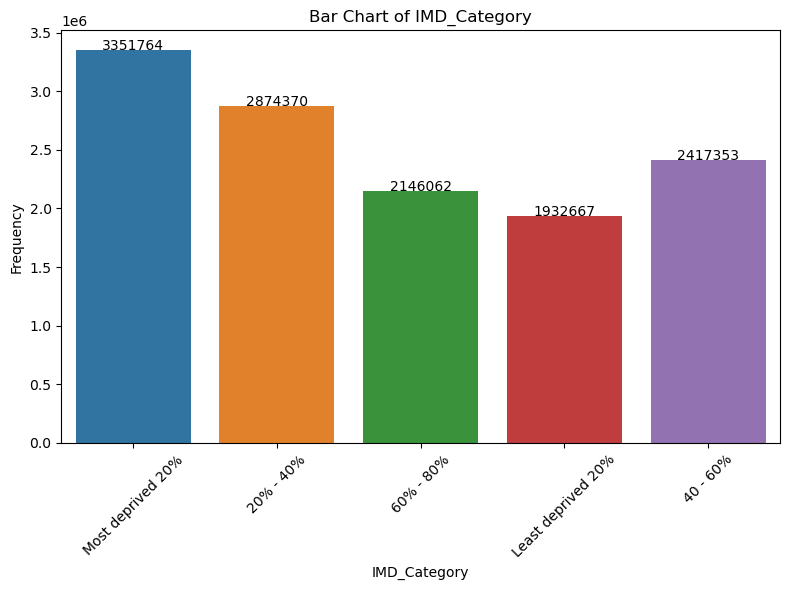

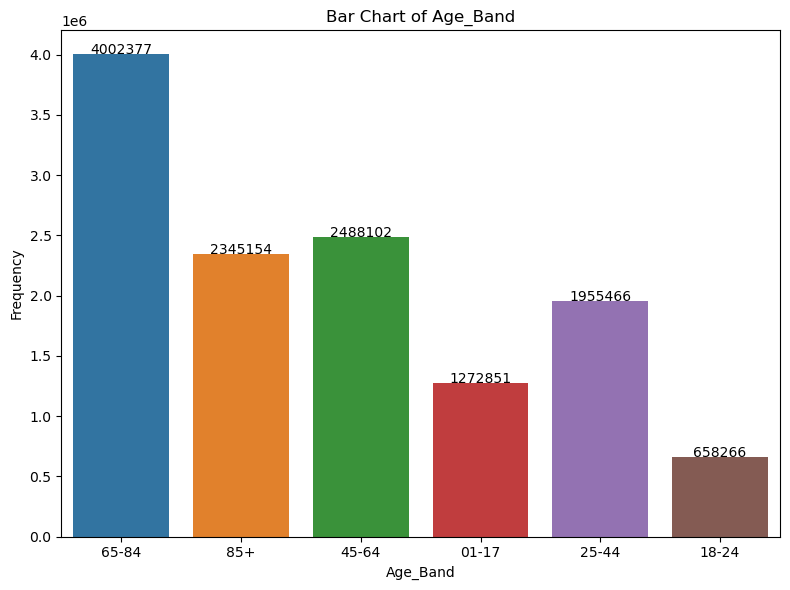

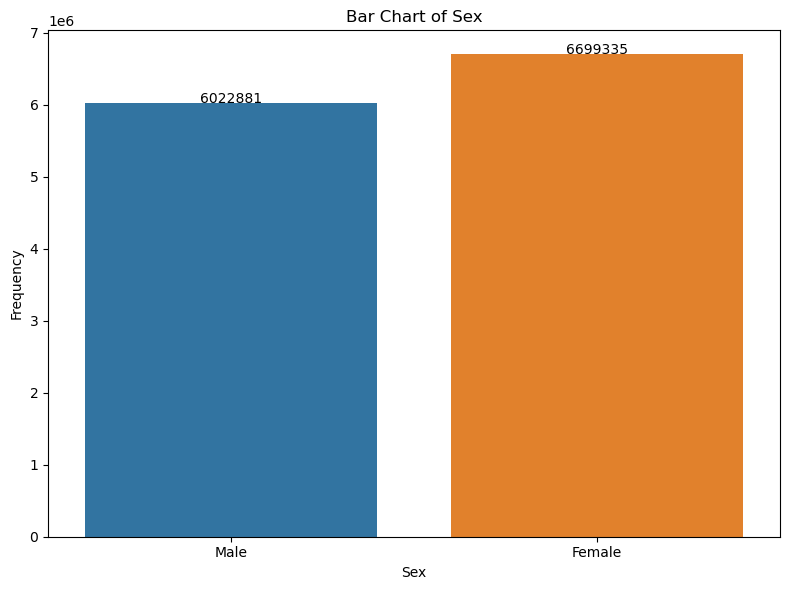

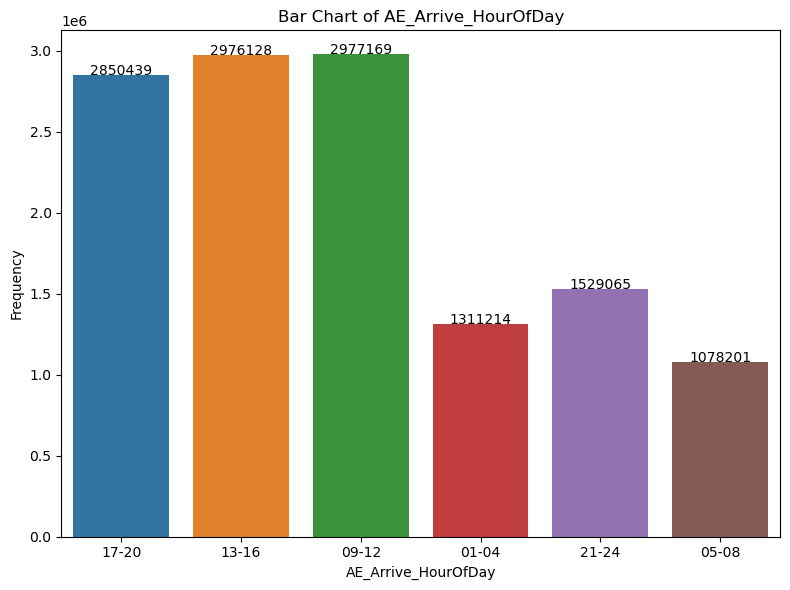

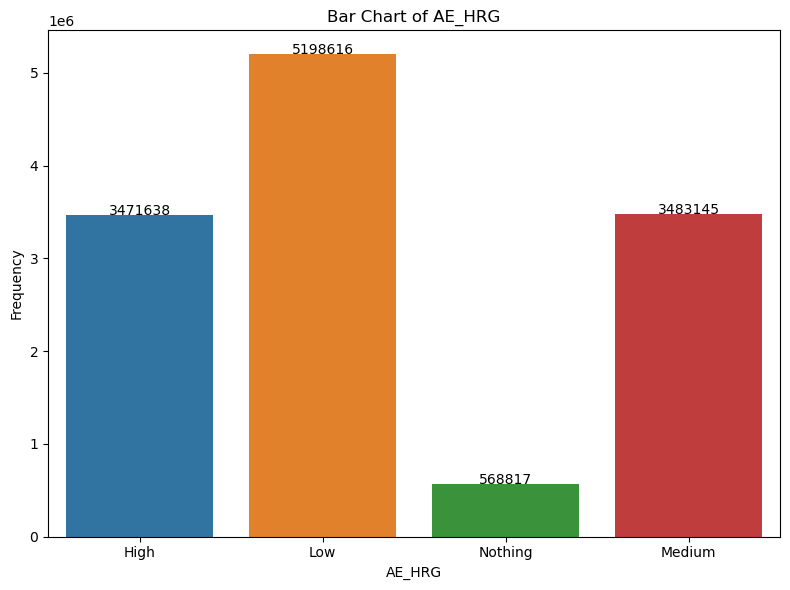

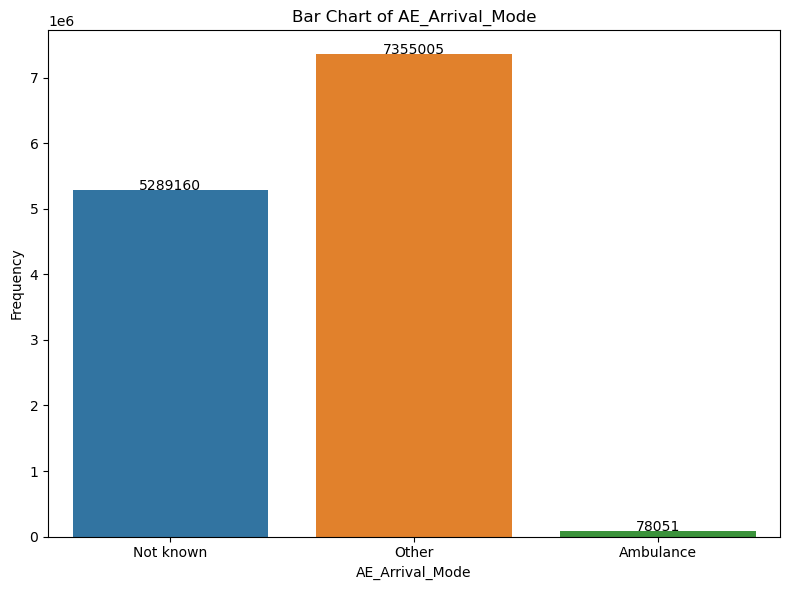

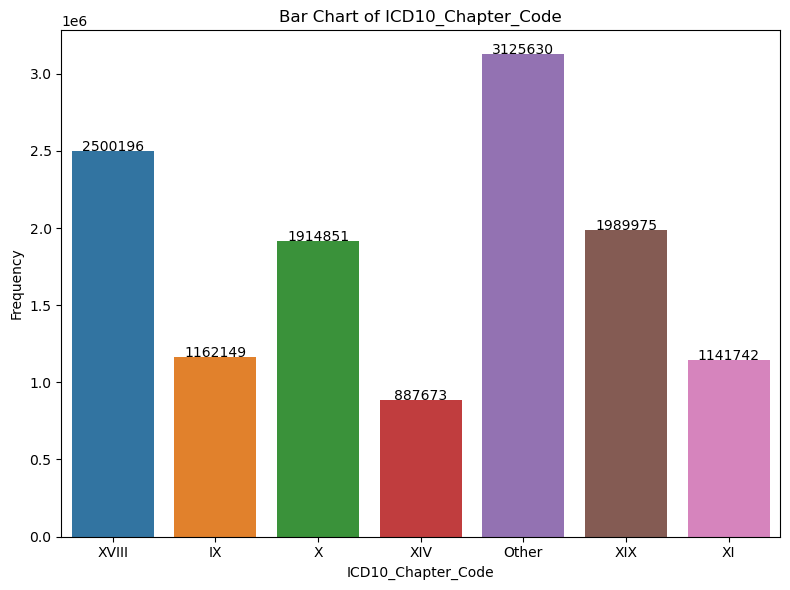

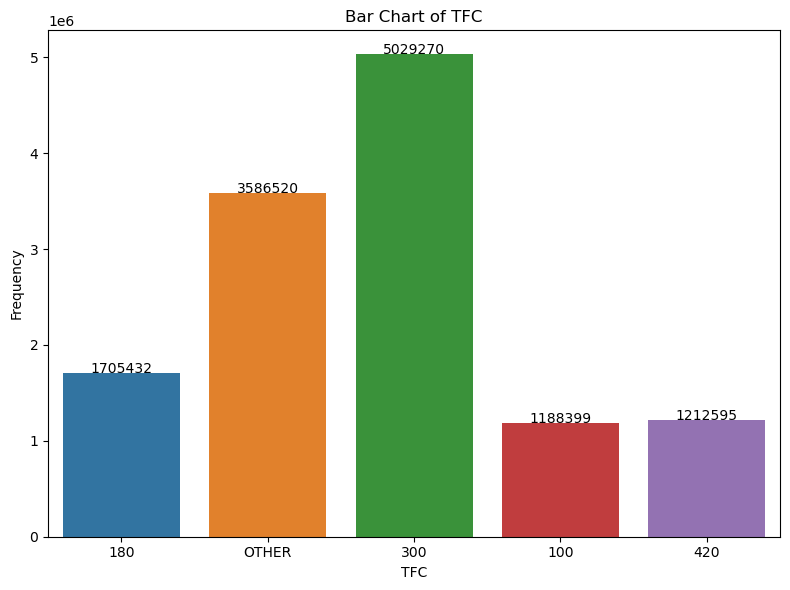

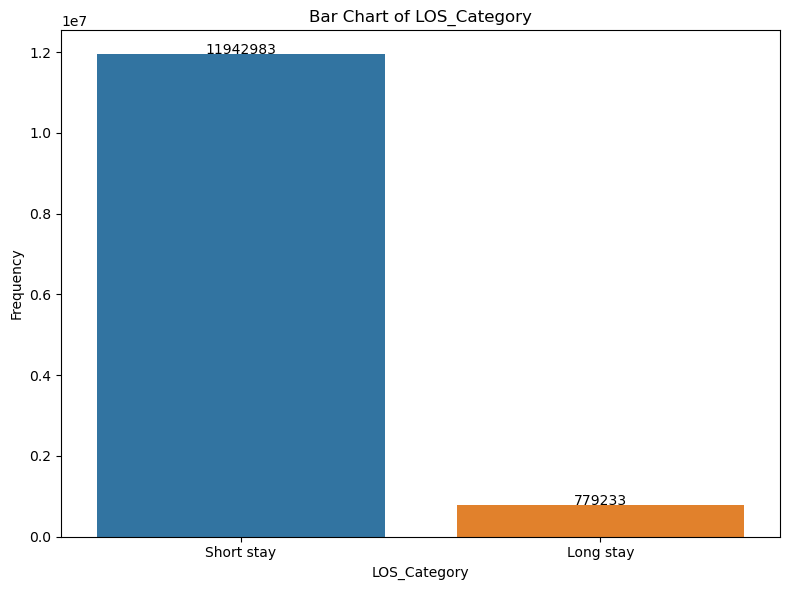

In [29]:


for var in categorical_and_ordinal_vars:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=var, data=df)
    
    # Add counts on top of the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline')
    
    # Title and labels
    plt.title(f"Bar Chart of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    
    # Rotate x-labels for IMD_Category
    if var == 'IMD_Category':
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig(f"{var}_bar_chart_with_counts.png")
    plt.show()



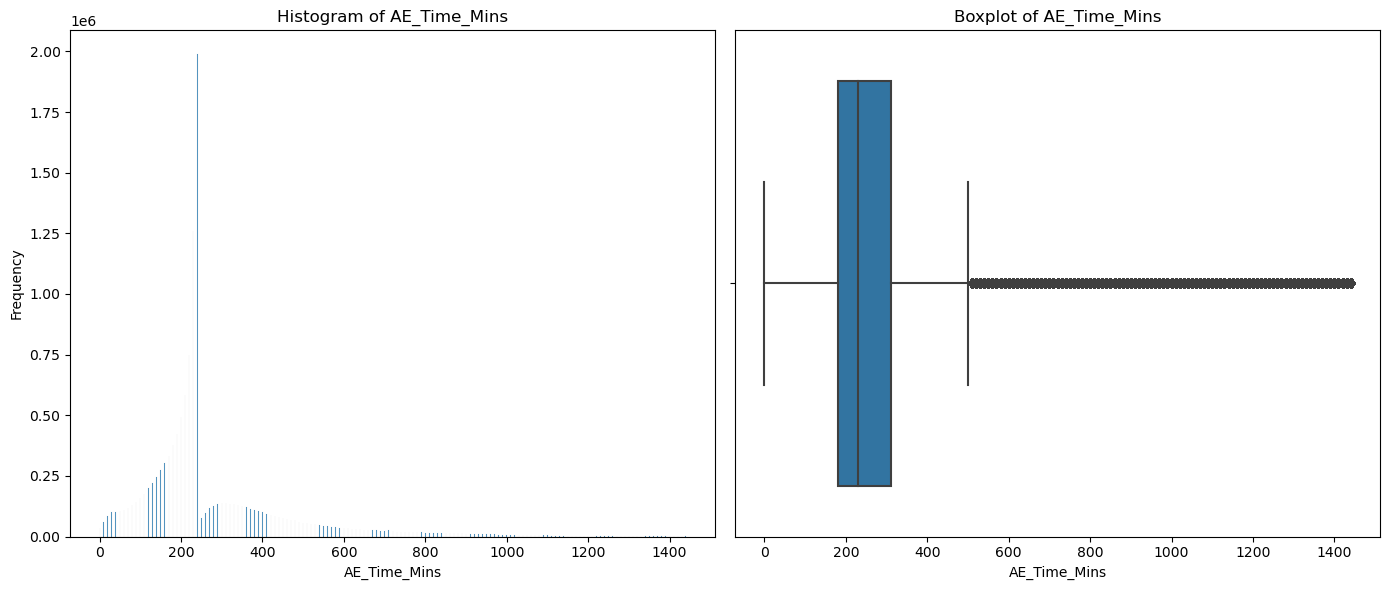

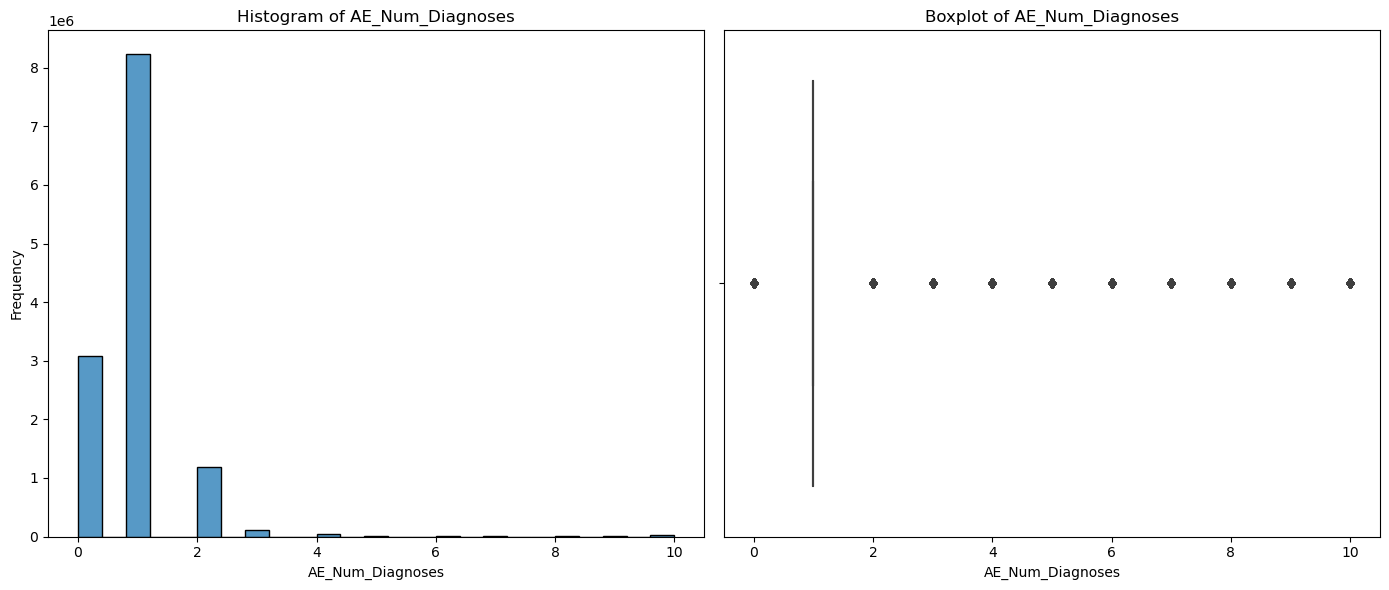

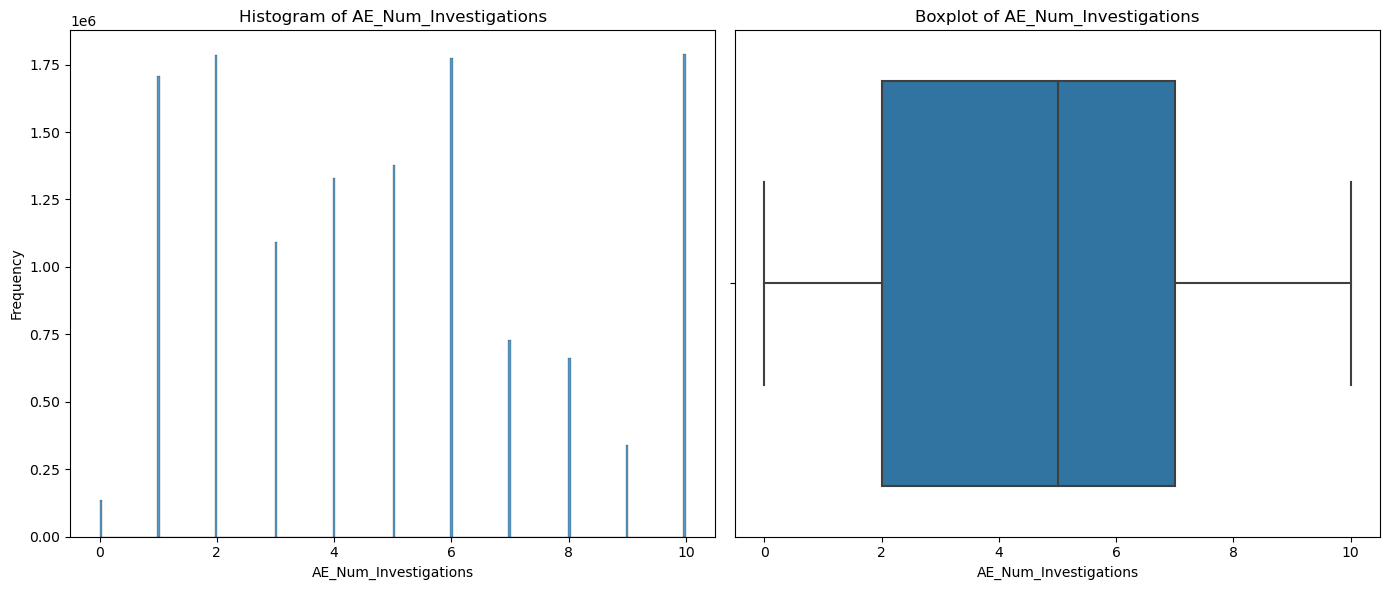

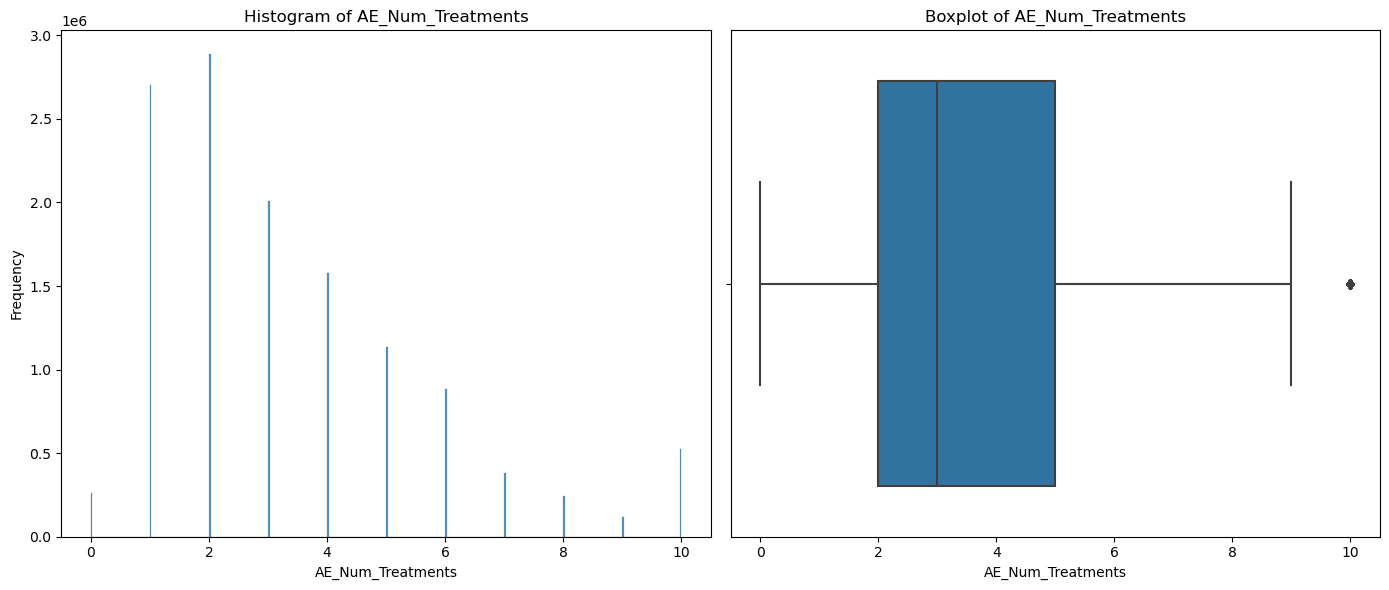

In [13]:
for var in continuous_vars:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot histogram on first subplot
    sns.histplot(df[var], kde=False, ax=axes[0])
    axes[0].set_title(f'Histogram of {var}')
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Frequency')
    
    # Plot boxplot on second subplot
    sns.boxplot(x=df[var], ax=axes[1])
    axes[1].set_title(f'Boxplot of {var}')
    axes[1].set_xlabel(var)
    
    # Show the plots
    plt.tight_layout()
    plt.savefig(f"{var}_summary_plots.png")
    plt.show()

## 1. Patient  Demographics

In [14]:
cross_tab = pd.crosstab([df['Age_Band'], df['Sex']], df['IMD_Category'])

cross_tab

IMD_Category     20% - 40%  40 - 60%  60% - 80%  Least deprived 20%  \
Age_Band Sex                                                          
01-17    Female     144769    116486     102452               93567   
         Male       148372    120442     105632               96678   
18-24    Female      93779     76234      67626               60424   
         Male        55735     45741      40921               37533   
25-44    Female     257406    203328     178162              160366   
         Male       195589    156048     136232              122993   
45-64    Female     266279    221399     195130              175058   
         Male       296746    246551     218746              195037   
65-84    Female     441293    382306     340477              305030   
         Male       452524    390828     348138              310778   
85+      Female     310968    272806     246527              224377   
         Male       210910    185184     166019              150826   

IMD_Category     Most deprived 20%  
Age_Band Sex                        
01-17    Female             169220  
         Male               175233  
18-24    Female             112798  
         Male                67475  
25-44    Female             309368  
         Male               235974  
45-64    Female             318438  
         Male               354718  
65-84    Female             510104  
         Male               520899  
85+      Female             343158  
         Male               234379

In [15]:
cross_tab_proportions = pd.crosstab([df['Age_Band'], df['Sex']], df['IMD_Category'], normalize='all') * 100

cross_tab_proportions

IMD_Category     20% - 40%  40 - 60%  60% - 80%  Least deprived 20%  \
Age_Band Sex                                                          
01-17    Female   1.137923  0.915611   0.805300            0.735461   
         Male     1.166243  0.946706   0.830296            0.759915   
18-24    Female   0.737128  0.599220   0.531558            0.474949   
         Male     0.438092  0.359536   0.321650            0.295019   
25-44    Female   2.023280  1.598212   1.400401            1.260519   
         Male     1.537382  1.226579   1.070820            0.966758   
45-64    Female   2.093024  1.740255   1.533774            1.376002   
         Male     2.332502  1.937956   1.719402            1.533043   
65-84    Female   3.468680  3.005027   2.676240            2.397617   
         Male     3.556959  3.072012   2.736457            2.442798   
85+      Female   2.444291  2.144328   1.937768            1.763663   
         Male     1.657809  1.455595   1.304953            1.185532   

IMD_Category     Most deprived 20%  
Age_Band Sex                        
01-17    Female           1.330114  
         Male             1.377378  
18-24    Female           0.886622  
         Male             0.530371  
25-44    Female           2.431715  
         Male             1.854818  
45-64    Female           2.503007  
         Male             2.788178  
65-84    Female           4.009553  
         Male             4.094405  
85+      Female           2.697313  
         Male             1.842281

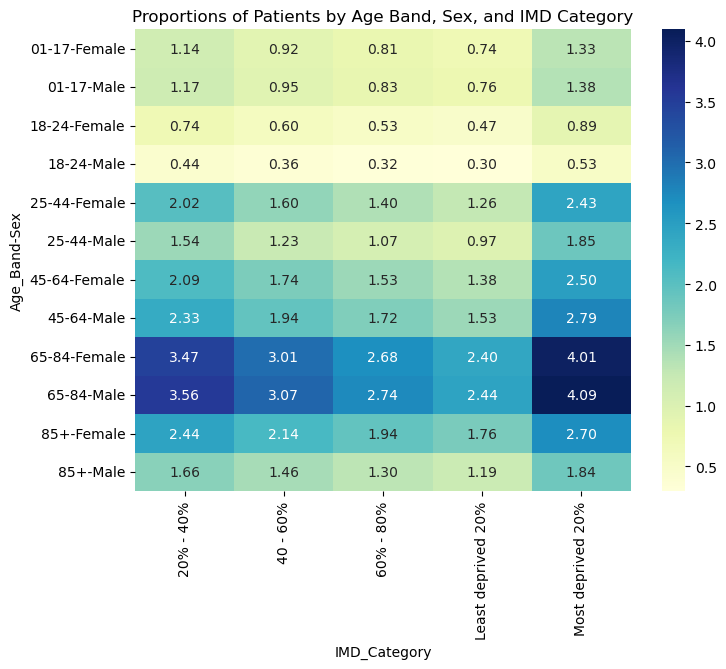

In [17]:
# Given that cross_tab_proportions is already structured properly for a heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_proportions, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Proportions of Patients by Age Band, Sex, and IMD Category")
plt.savefig("crosstab_age_IMD_summary_plots.png")
plt.show()

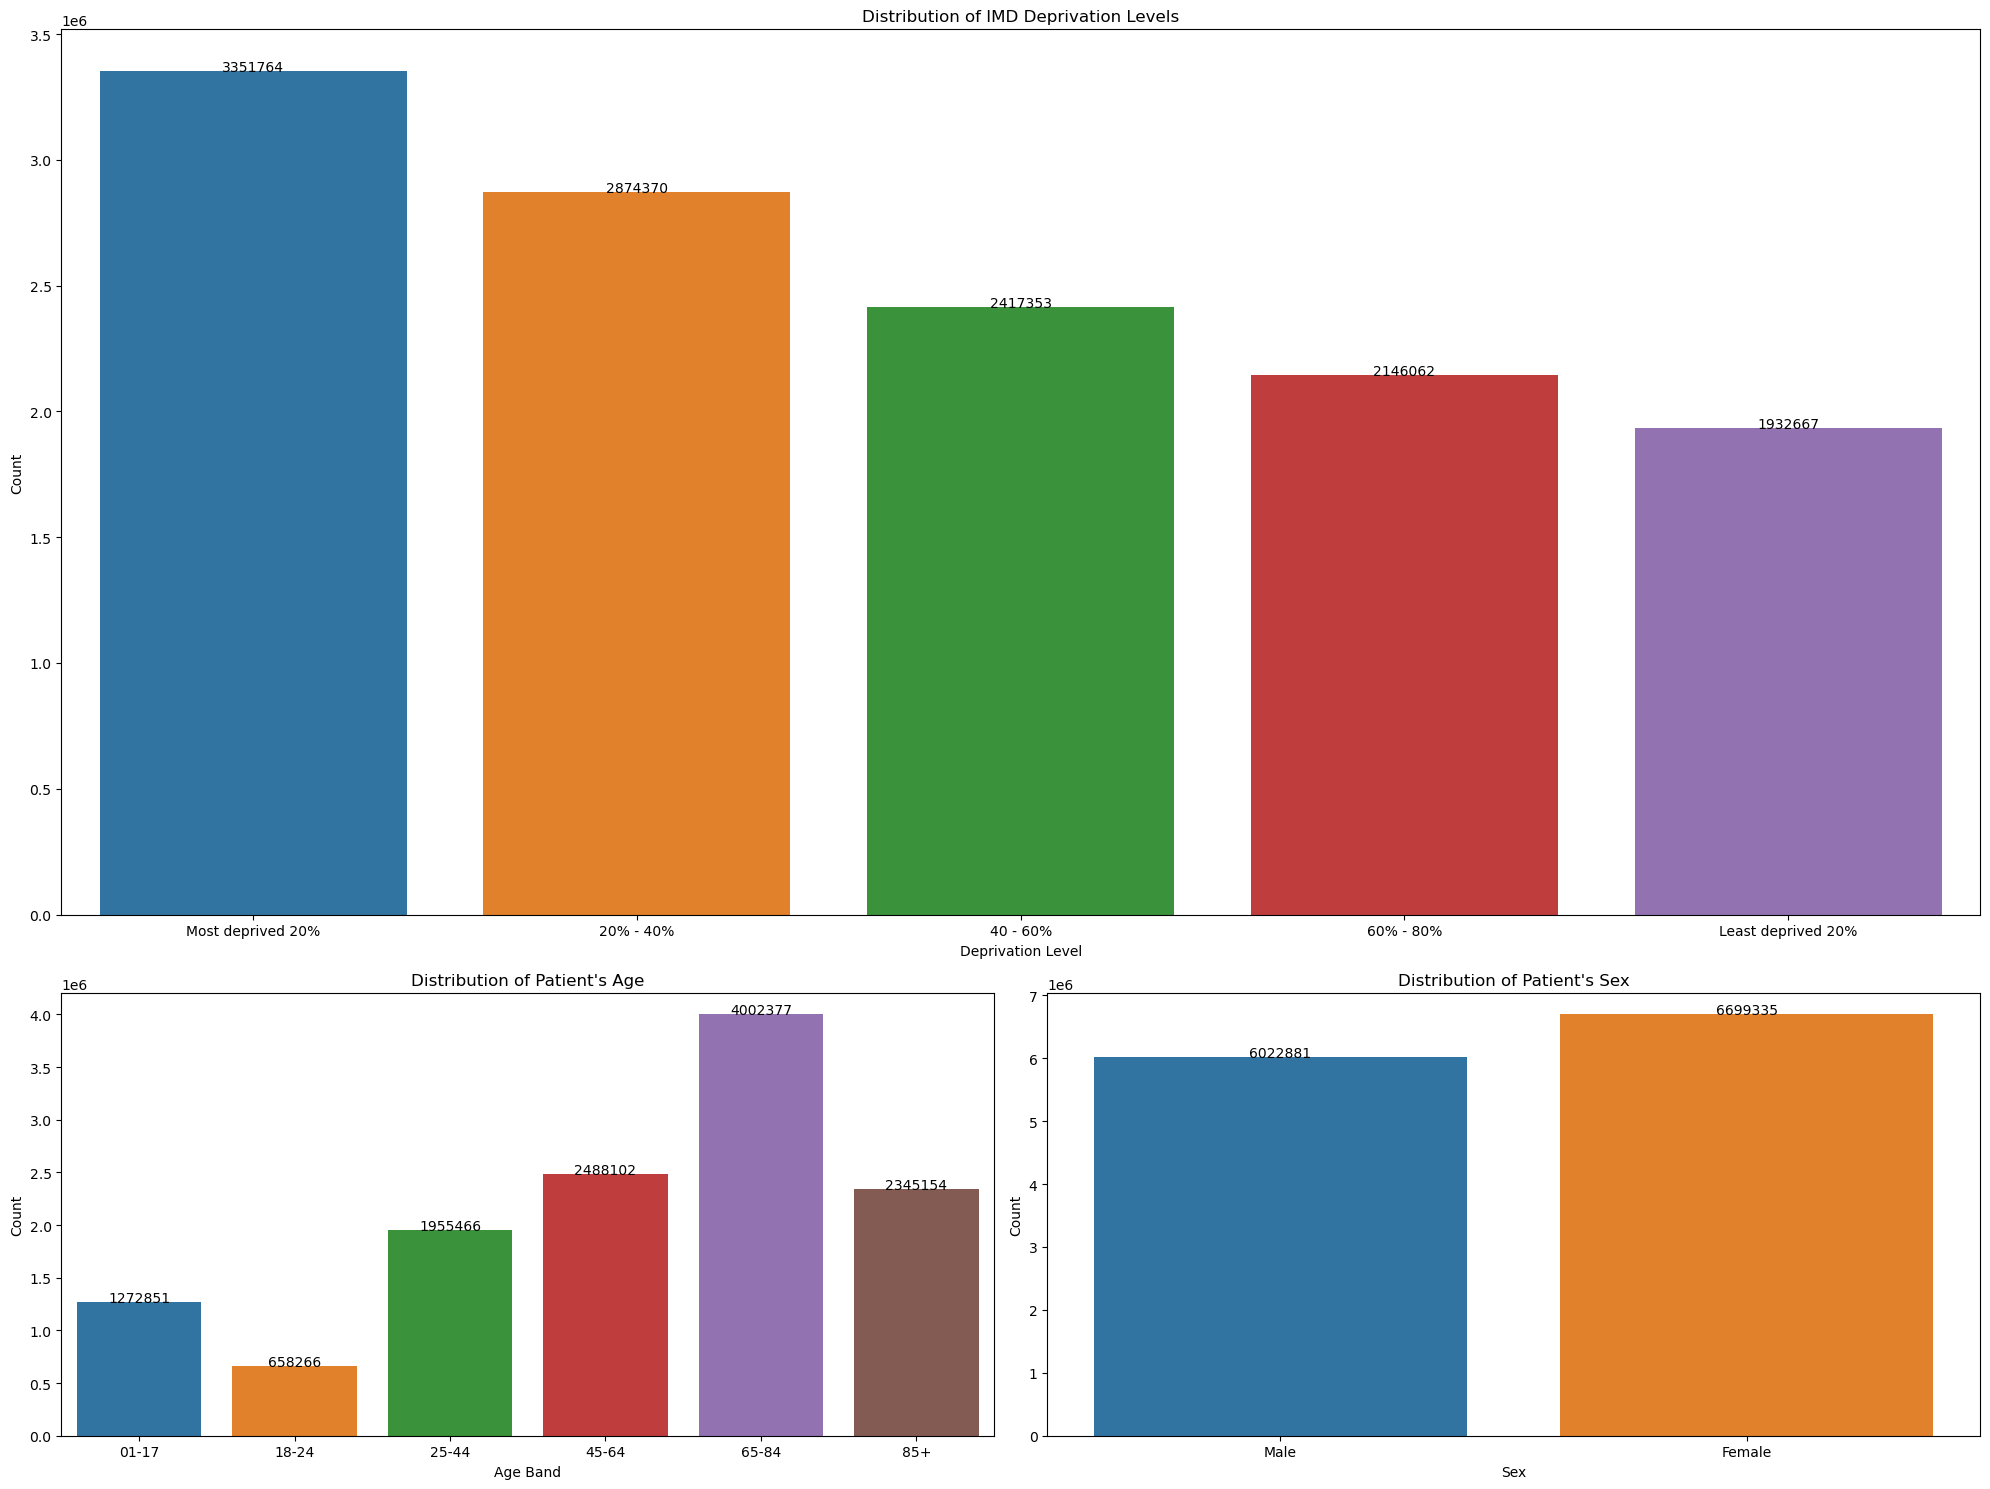

In [18]:
# Define the grid
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.5])

# Define figure
fig = plt.figure(figsize=(20, 15))

# Create axes
ax0 = plt.subplot(gs[0, :])
ax1 = plt.subplot(gs[1, 0])
ax2 = plt.subplot(gs[1, 1])

# Plotting the first chart on the first row
IMD_labels = ['Most deprived 20%', '20% - 40%', '40 - 60%', '60% - 80%', 'Least deprived 20%']

sns.countplot(x='IMD_Category', data=df, order = IMD_labels, ax=ax0)
ax0.set_title('Distribution of IMD Deprivation Levels')
ax0.set_xlabel('Deprivation Level')
ax0.set_ylabel('Count')
for p in ax0.patches:
    height = p.get_height()
    ax0.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")

# Plotting the second chart on the second row
Age_labels = ['01-17', '18-24', '25-44', '45-64', '65-84', '85+']

sns.countplot(x='Age_Band', data=df, order = Age_labels, ax=ax1) 
ax1.set_title("Distribution of Patient's Age")
ax1.set_xlabel('Age Band')
ax1.set_ylabel('Count')
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
    
# Plotting the third chart on the second row
sns.countplot(x='Sex', data=df, ax=ax2) 
ax2.set_title("Distribution of Patient's Sex")
ax2.set_xlabel('Sex')
ax2.set_ylabel('Count')
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
    
plt.tight_layout()
plt.savefig("demographic_summary_plots.png")
plt.show()


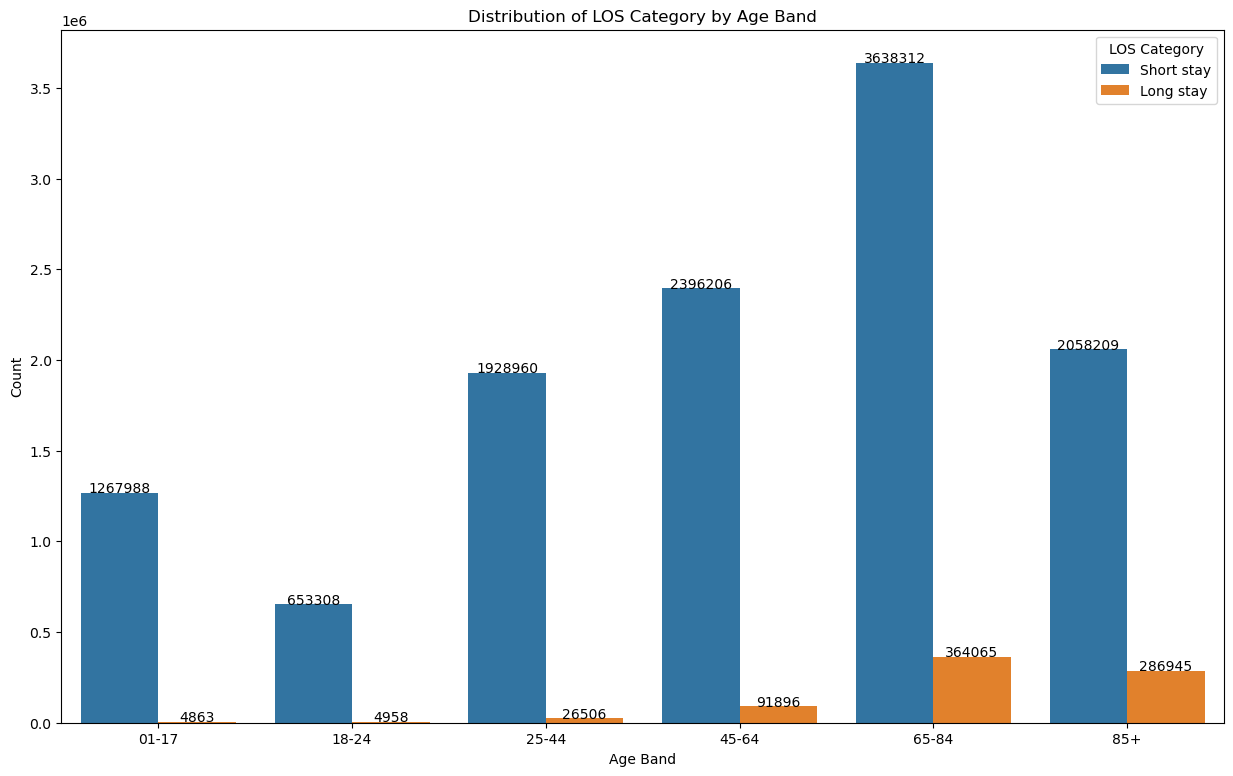

In [19]:
# Assuming Age_labels is the correct variable name
Age_labels = ['01-17', '18-24', '25-44', '45-64', '65-84', '85+']

plt.figure(figsize=(15, 9))

ax = sns.countplot(x='Age_Band', hue='LOS_Category', data=df, order=Age_labels)
# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

plt.title('Distribution of LOS Category by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.legend(title="LOS Category")
plt.savefig("LOS_demo_summary_plots.png")
plt.show()


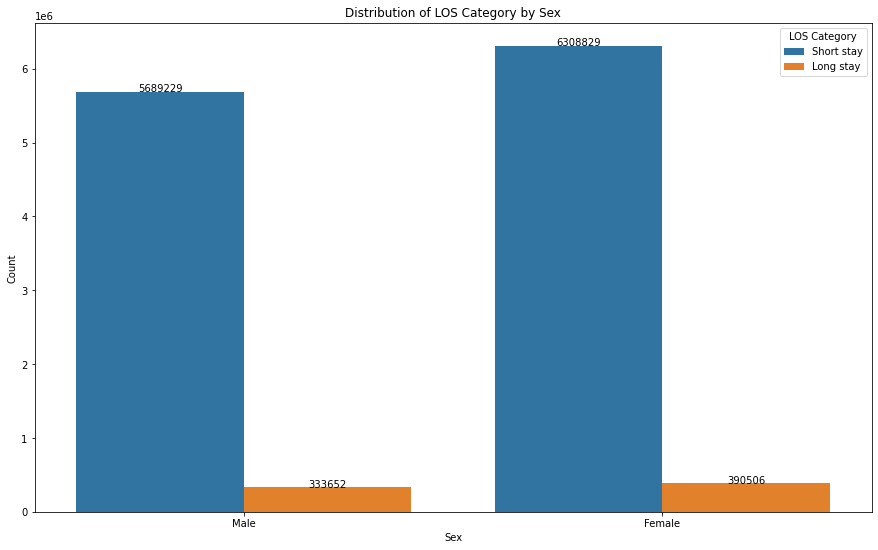

In [32]:
# Plot a barchart
plt.figure(figsize=(15, 9))

ax = sns.countplot(x='Sex', hue='LOS_Category', data=df)
# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

plt.title('Distribution of LOS Category by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title="LOS Category")
plt.show()


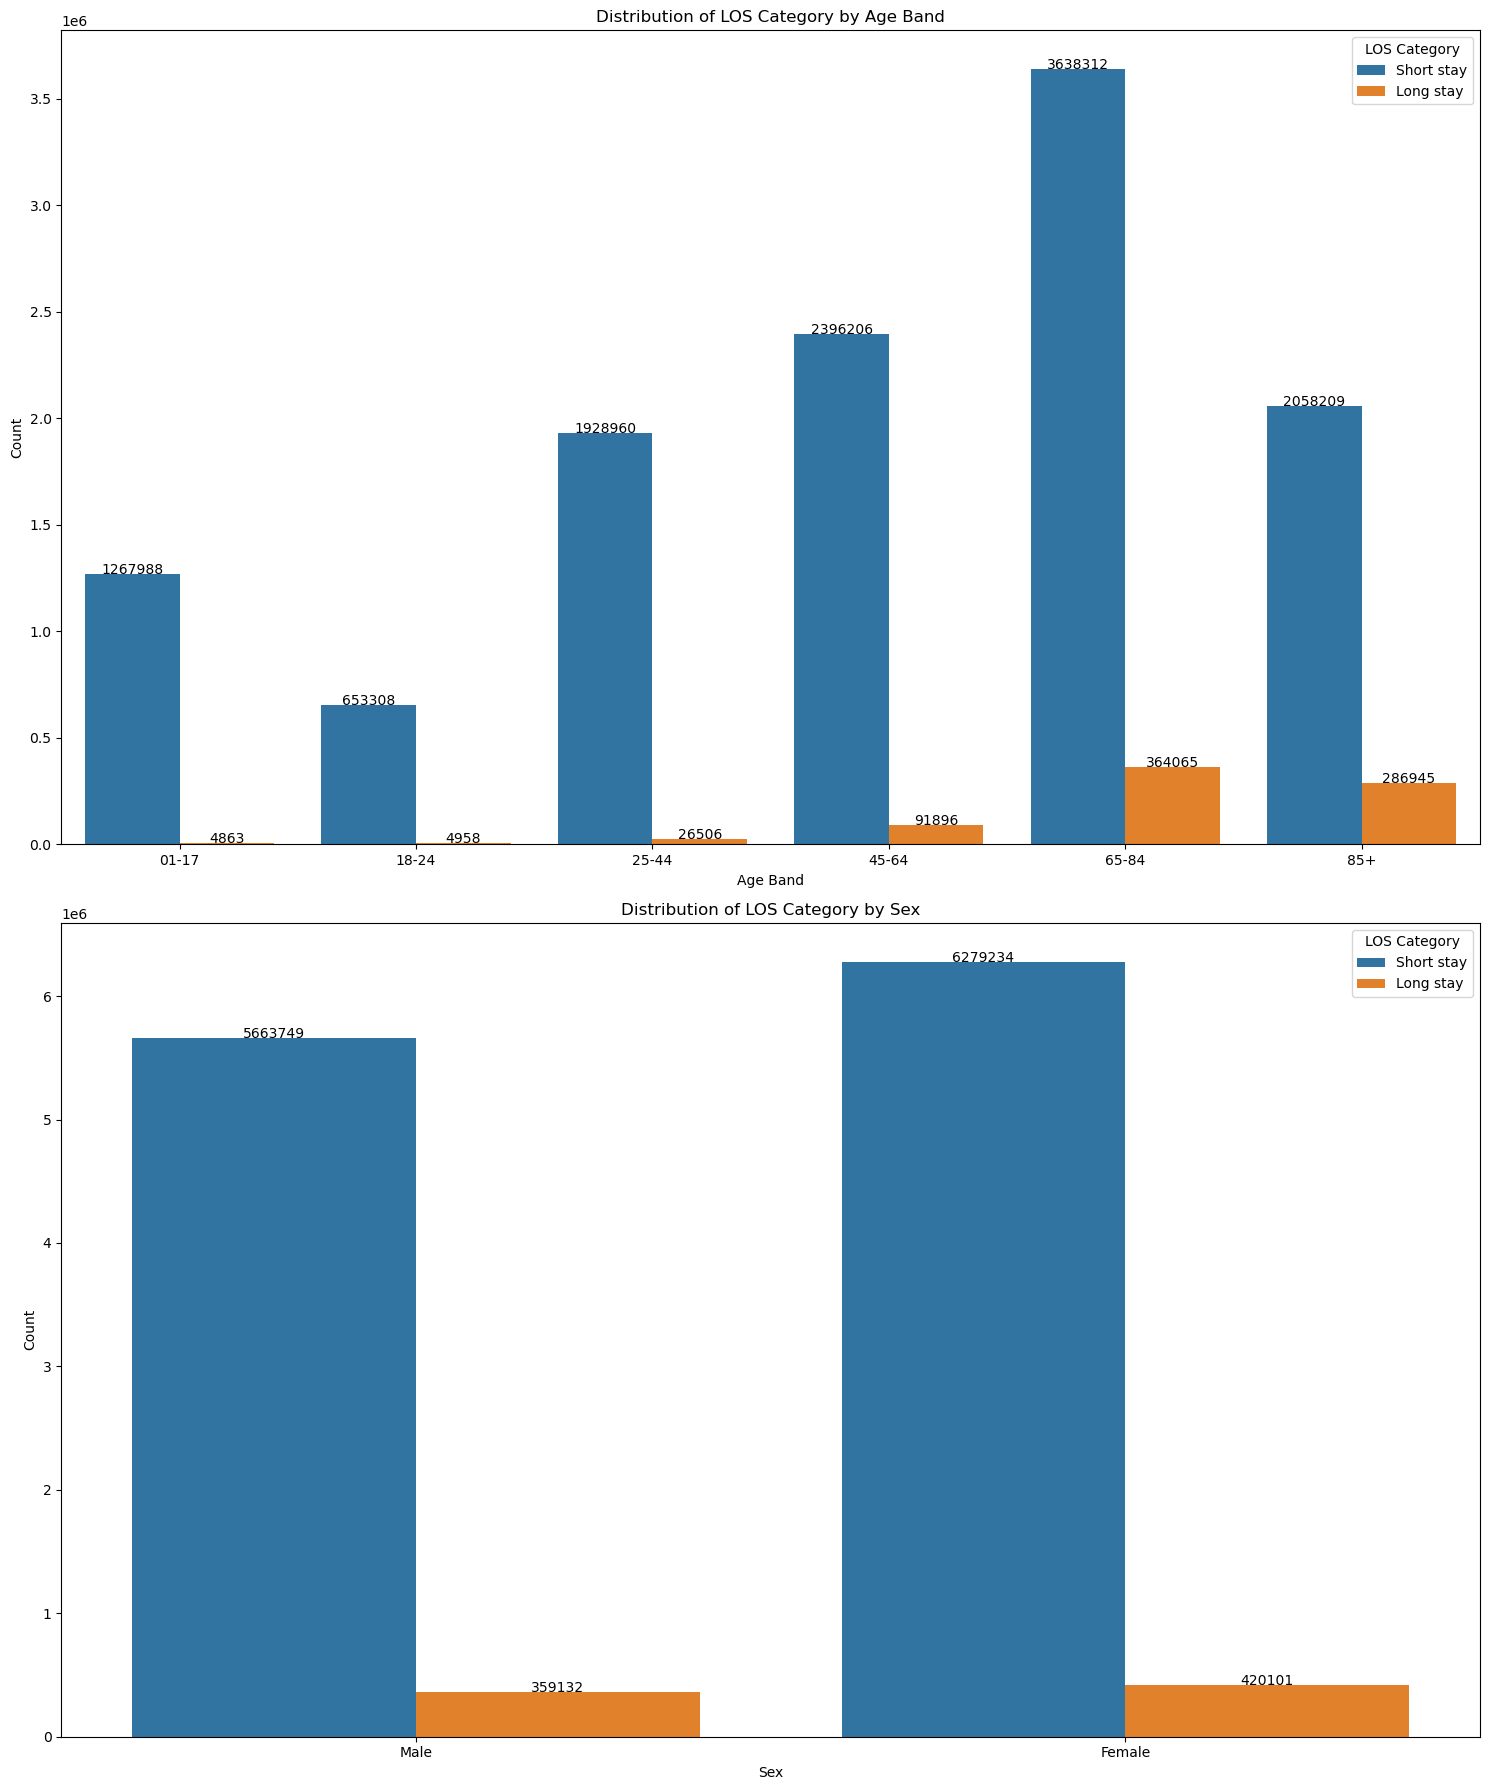

In [20]:
fig, axarr = plt.subplots(2, 1, figsize=(15, 18))

# Plot for 'Distribution of LOS Category by Age Band'
sns.countplot(x='Age_Band', hue='LOS_Category', data=df, order=Age_labels, ax=axarr[0])
axarr[0].set_title('Distribution of LOS Category by Age Band')
axarr[0].set_xlabel('Age Band')
axarr[0].set_ylabel('Count')
axarr[0].legend(title="LOS Category")

# Add count numbers on top of each bar for first plot
for p in axarr[0].patches:
    height = p.get_height()
    axarr[0].text(p.get_x() + p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")

# Plot for 'Distribution of LOS Category by Sex'
sns.countplot(x='Sex', hue='LOS_Category', data=df, ax=axarr[1])
axarr[1].set_title('Distribution of LOS Category by Sex')
axarr[1].set_xlabel('Sex')
axarr[1].set_ylabel('Count')
axarr[1].legend(title="LOS Category")

# Add count numbers on top of each bar for second plot
for p in axarr[1].patches:
    height = p.get_height()
    axarr[1].text(p.get_x() + p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")

plt.tight_layout()  # Adjust spacing between subplots
plt.savefig("LOS_demo_age_summary_plots.png")
plt.show()

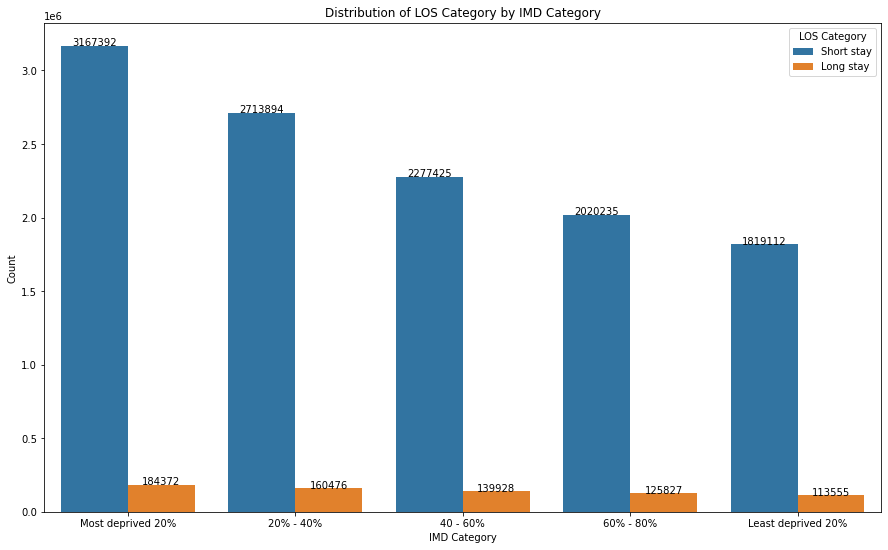

In [34]:
# Plot a barchart
plt.figure(figsize=(15, 9))

IMD_labels = ['Most deprived 20%', '20% - 40%', '40 - 60%', '60% - 80%', 'Least deprived 20%']


ax = sns.countplot(x='IMD_Category', hue='LOS_Category', data=df, order = IMD_labels)
# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

plt.title('Distribution of LOS Category by IMD Category')
plt.xlabel('IMD Category')
plt.ylabel('Count')
plt.legend(title="LOS Category")
plt.show()


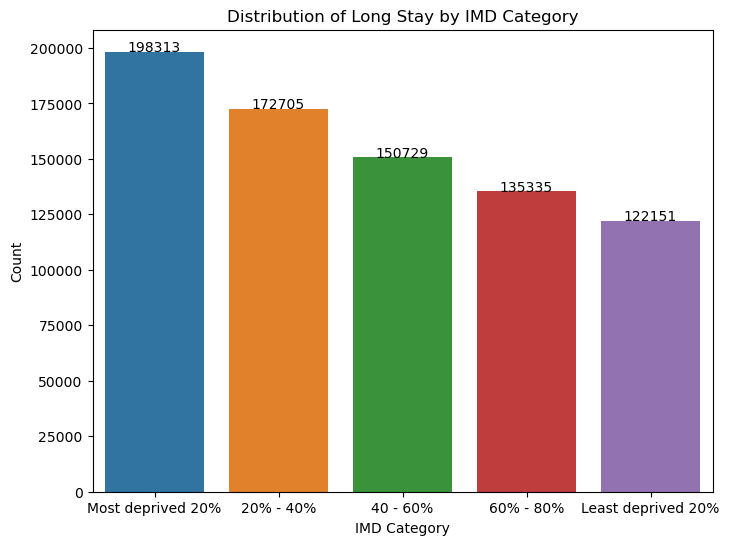

In [22]:
# Filter the dataframe to only show 'Long stay'
df_long_stay = df[df['LOS_Category'] == 'Long stay']

# Plot a barchart
plt.figure(figsize=(8, 6))

IMD_labels = ['Most deprived 20%', '20% - 40%', '40 - 60%', '60% - 80%', 'Least deprived 20%']

ax = sns.countplot(x='IMD_Category', data=df_long_stay, order=IMD_labels)

# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

plt.title('Distribution of Long Stay by IMD Category')
plt.xlabel('IMD Category')
plt.ylabel('Count')
plt.savefig("imd_score_summary_plots.png")
plt.show()


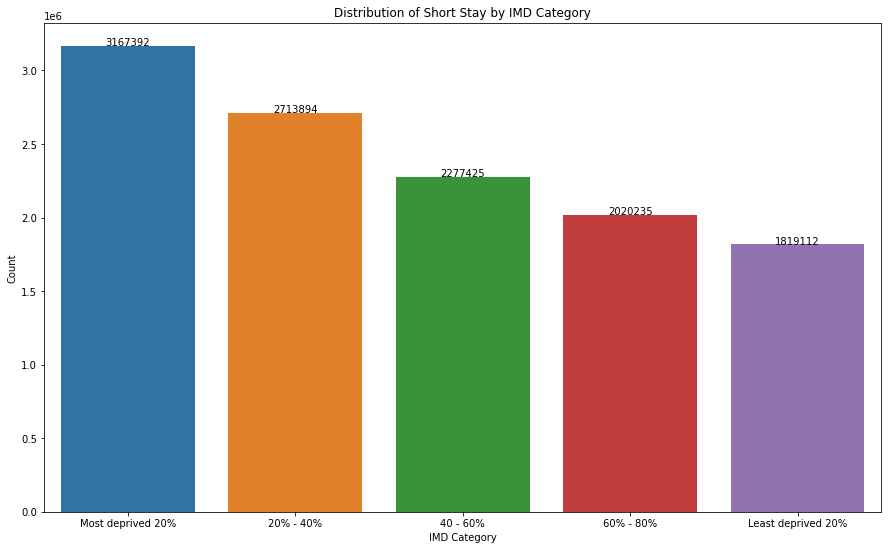

In [37]:
# Filter the dataframe to only show 'Long stay'
df_short_stay = df[df['LOS_Category'] == 'Short stay']

# Plot a barchart
plt.figure(figsize=(15, 9))

IMD_labels = ['Most deprived 20%', '20% - 40%', '40 - 60%', '60% - 80%', 'Least deprived 20%']

ax = sns.countplot(x='IMD_Category', data=df_short_stay, order=IMD_labels)

# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

plt.title('Distribution of Short Stay by IMD Category')
plt.xlabel('IMD Category')
plt.ylabel('Count')
plt.show()


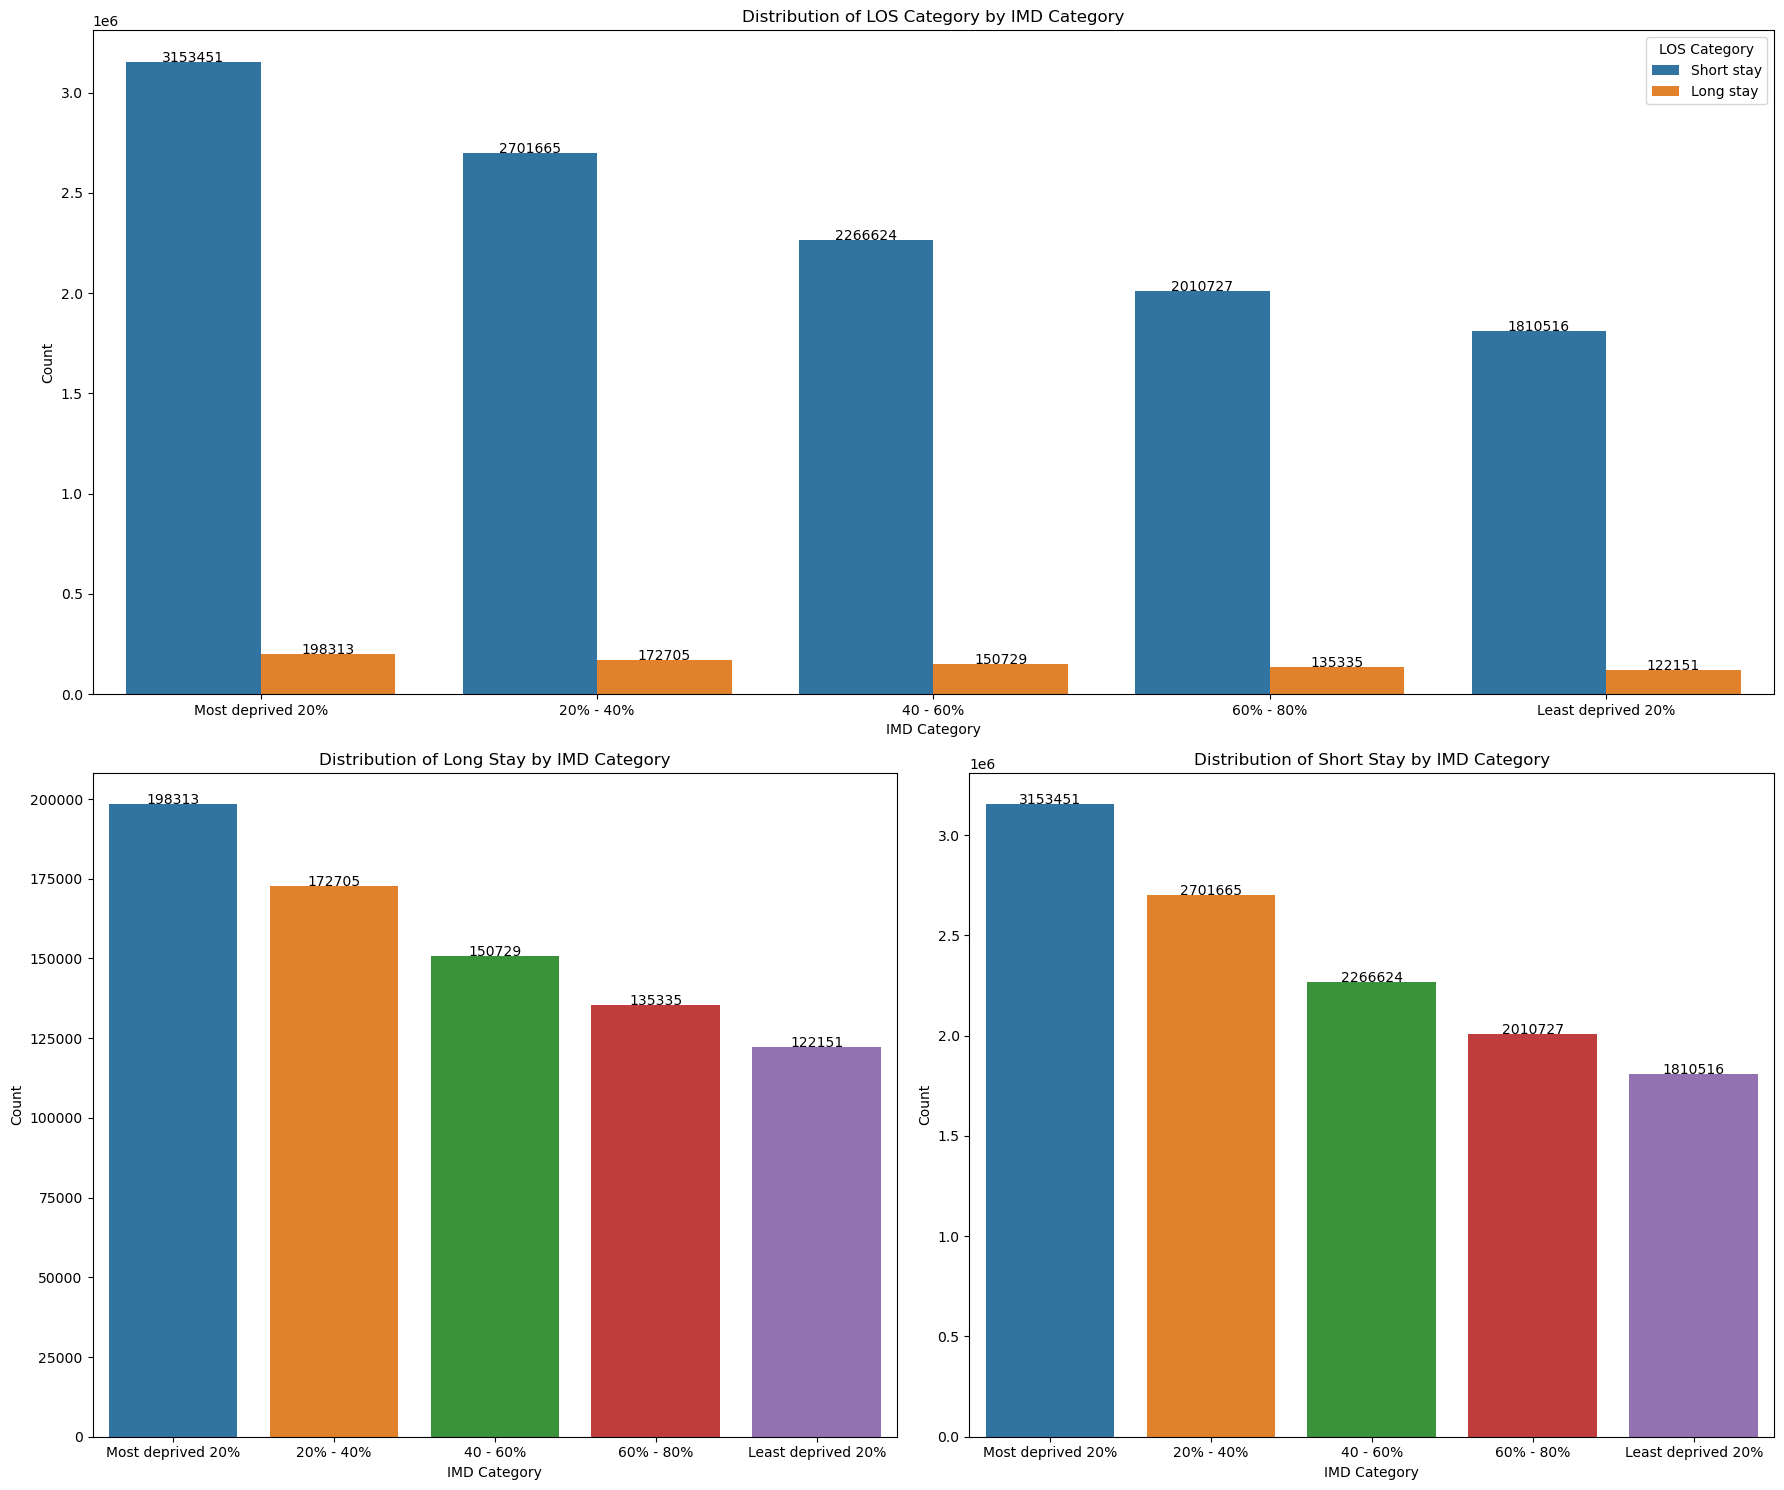

In [23]:
IMD_labels = ['Most deprived 20%', '20% - 40%', '40 - 60%', '60% - 80%', 'Least deprived 20%']

fig, axarr = plt.subplots(2, 2, figsize=(18, 15))
# Make the first row, first and second columns into a single axis for the combined plot
axarr[0, 0].remove()  # remove the first plot space
axarr[0, 1].remove()  # remove the second plot space
ax_big = fig.add_subplot(2, 1, 1)  # add a subplot that spans the whole width

# Plot the first chart
sns.countplot(x='IMD_Category', hue='LOS_Category', data=df, order=IMD_labels, ax=ax_big)
ax_big.set_title('Distribution of LOS Category by IMD Category')
ax_big.set_xlabel('IMD Category')
ax_big.set_ylabel('Count')
ax_big.legend(title="LOS Category")

# Filter the dataframe
df_long_stay = df[df['LOS_Category'] == 'Long stay']
sns.countplot(x='IMD_Category', data=df_long_stay, order=IMD_labels, ax=axarr[1, 0])
axarr[1, 0].set_title('Distribution of Long Stay by IMD Category')
axarr[1, 0].set_xlabel('IMD Category')
axarr[1, 0].set_ylabel('Count')

# Filter the dataframe
df_short_stay = df[df['LOS_Category'] == 'Short stay']
sns.countplot(x='IMD_Category', data=df_short_stay, order=IMD_labels, ax=axarr[1, 1])
axarr[1, 1].set_title('Distribution of Short Stay by IMD Category')
axarr[1, 1].set_xlabel('IMD Category')
axarr[1, 1].set_ylabel('Count')

# Add count numbers
for ax in [ax_big, axarr[1, 0], axarr[1, 1]]:
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")

plt.tight_layout()  # Adjust spacing between subplots
plt.savefig("los_version2_summary_plots.png")
plt.show()


## 2. Time  Variables

## 2.1 Month of Arrival

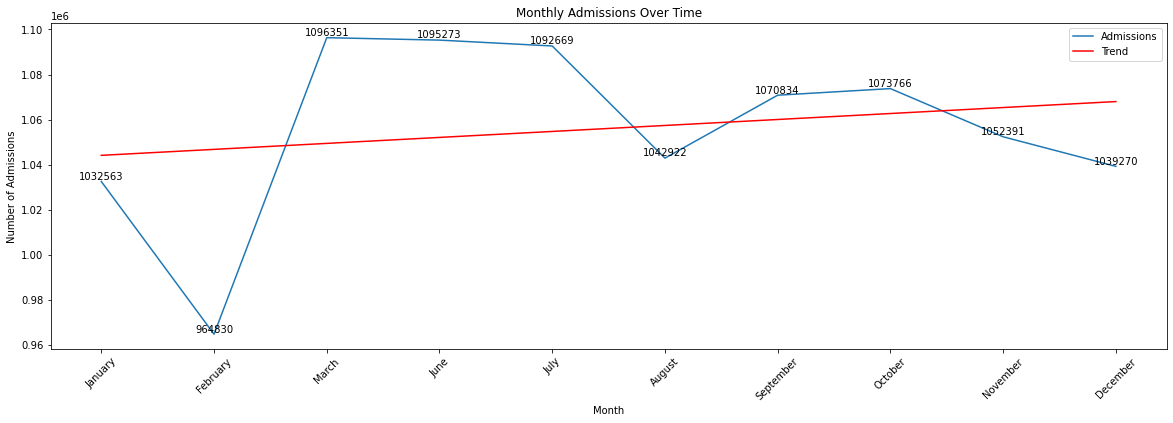

In [26]:
df = df.copy()

labels = ['January', 'February', 'March', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Make sure df['Month'] is of type 'category' and is ordered correctly
df['Month'] = pd.Categorical(df['Month'], categories=labels, ordered=True)

# Get monthly counts of admissions
monthly_counts = df['Month'].value_counts().sort_index()

# Create a numeric index for the x values
x = np.arange(len(monthly_counts))

# Get the y values (counts for each month)
y = monthly_counts.values

# Fit a line to the data
coefficients = np.polyfit(x, y, 1)
trendline = coefficients[0] * x + coefficients[1]

# Plot the original data
plt.figure(figsize=(20,6))
plt.plot(x, y, label='Admissions')

# Plot the fitted line
plt.plot(x, trendline, label='Trend', color='red')

# Add count numbers on top of the line
for i, v in enumerate(y):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Monthly Admissions Over Time')
plt.xticks(ticks=x, labels=labels, rotation=45)  # Use ordered labels here
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.legend()
plt.show()



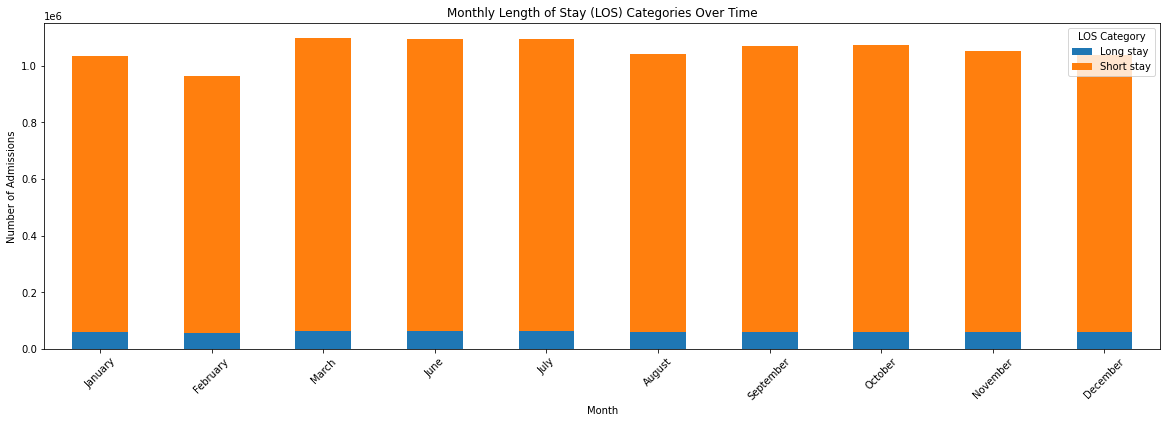

In [10]:

df = df.copy()

labels = ['January', 'February', 'March', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Make sure df['Month'] is of type 'category' and is ordered correctly
df['Month'] = pd.Categorical(df['Month'], categories=labels, ordered=True)
# Group by Month and LOS_category and get the counts
monthly_los_counts = df.groupby(['Month', 'LOS_Category']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(20, 6))
monthly_los_counts.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Monthly Length of Stay (LOS) Categories Over Time')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.legend(title="LOS Category")
plt.show()

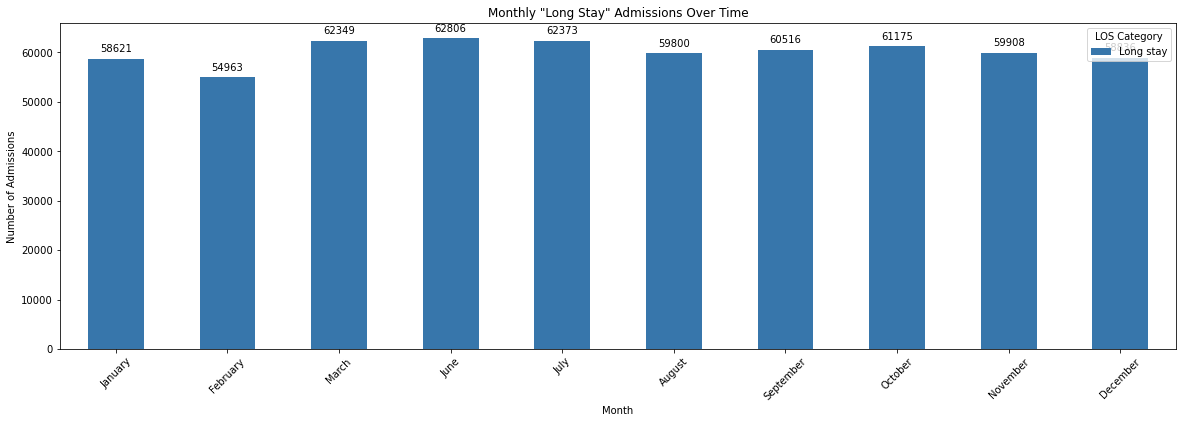

In [43]:
# Filter for "Long" stay only
long_stay = monthly_los_counts['Long stay']

# Plot
plt.figure(figsize=(20, 6))
ax = long_stay.plot(kind='bar', color='#3776ab')  # Here you can choose the color you want

plt.title('Monthly "Long Stay" Admissions Over Time')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.legend(title="LOS Category")

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()



In [15]:
print(long_stay)

Month
January      58621
February     54963
March        62349
June         62806
July         62373
August       59800
September    60516
October      61175
November     59908
December     58836
Name: Long stay, dtype: int64


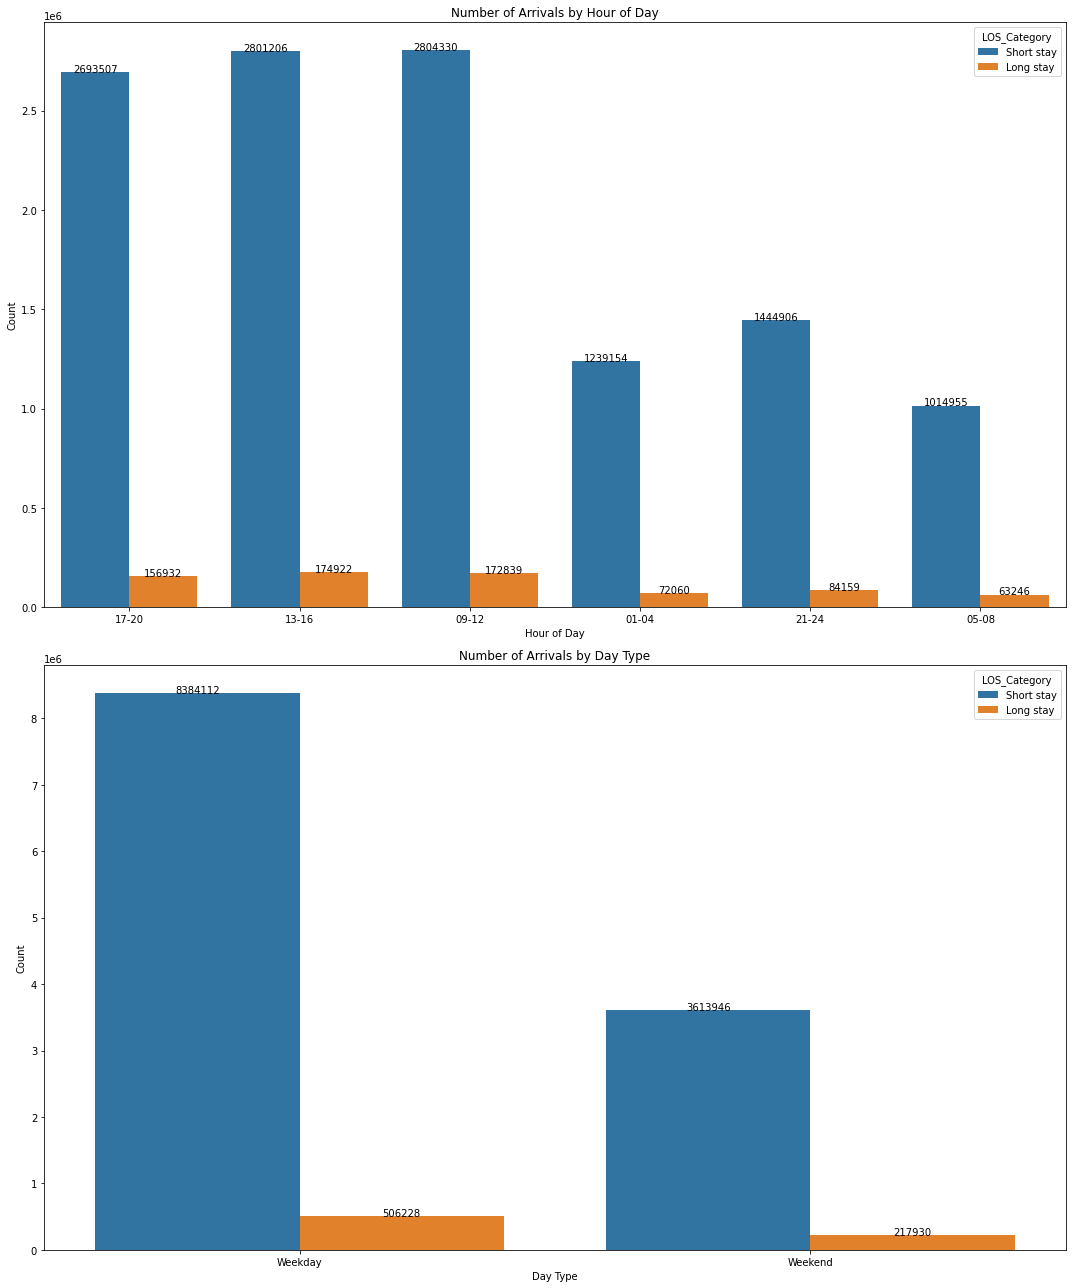

In [48]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 18))

# First plot
ax1 = sns.countplot(x='AE_Arrive_HourOfDay', hue='LOS_Category', data=df, ax=axes[0])
# Add count numbers on top of each bar
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")

axes[0].set_title('Number of Arrivals by Hour of Day')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Count')

# Second plot
ax2 = sns.countplot(x='IsWeekend', hue='LOS_Category', data=df, ax=axes[1])
# Add count numbers on top of each bar
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2.,
             height + 3,
             '{:1.0f}'.format(height),
             ha="center")

axes[1].set_title('Number of Arrivals by Day Type')
axes[1].set_xlabel('Day Type')
axes[1].set_ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure containing the two plots
plt.show()


## 3. Histograms

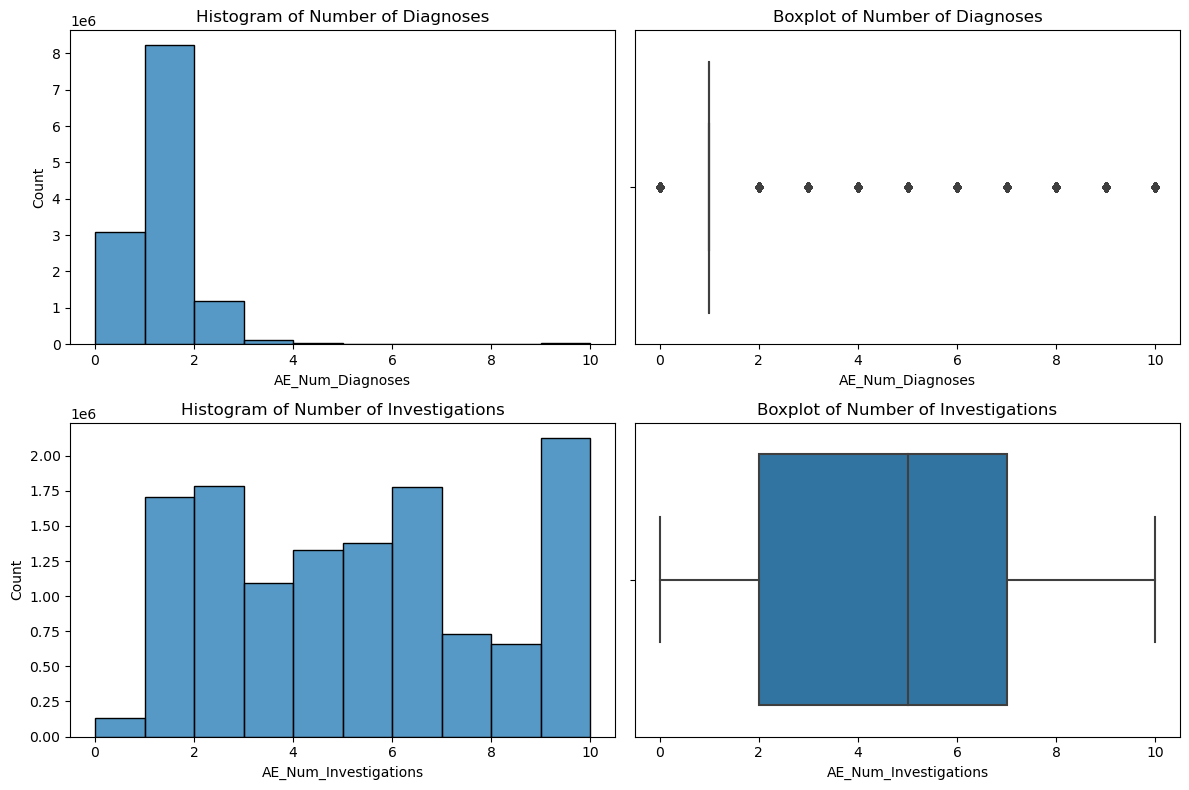

In [24]:

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot a histogram and a boxplot for each of the two variables: var1, var2
sns.histplot(df['AE_Num_Diagnoses'], ax=axes[0, 0], bins=10)
sns.boxplot(x=df['AE_Num_Diagnoses'], ax=axes[0, 1])

sns.histplot(df['AE_Num_Investigations'], ax=axes[1, 0], bins=10)
sns.boxplot(x=df['AE_Num_Investigations'], ax=axes[1, 1])

# Add titles to the subplots
axes[0, 0].set_title('Histogram of Number of Diagnoses')
axes[0, 1].set_title('Boxplot of Number of Diagnoses')
axes[1, 0].set_title('Histogram of Number of Investigations')
axes[1, 1].set_title('Boxplot of Number of Investigations')

# Display the figure with 4 plots
plt.tight_layout()
plt.savefig("histograms_plots.png")
plt.show()


In [ ]:

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot a histogram and a boxplot for each of the two variables: var1, var2
sns.histplot(df['AE_Num_Treatments'], ax=axes[0, 0], bins=10)
sns.boxplot(x=df['AE_Num_Treatments'], ax=axes[0, 1])

sns.histplot(df['Provider_Patient_Distance_Miles'], ax=axes[1, 0], bins=10)
sns.boxplot(x=df['Provider_Patient_Distance_Miles'], ax=axes[1, 1])

# Add titles to the subplots
axes[0, 0].set_title('Histogram of Number of Treatments')
axes[0, 1].set_title('Boxplot of Number of Treatments')
axes[1, 0].set_title('Histogram of Distance between Patient & Provider (Miles)')
axes[1, 1].set_title('Boxplot of Distance between Patient & Provider (Miles)')

# Display the figure with 4 plots
plt.tight_layout()
plt.savefig("anotherhis_plots.png")
plt.show()




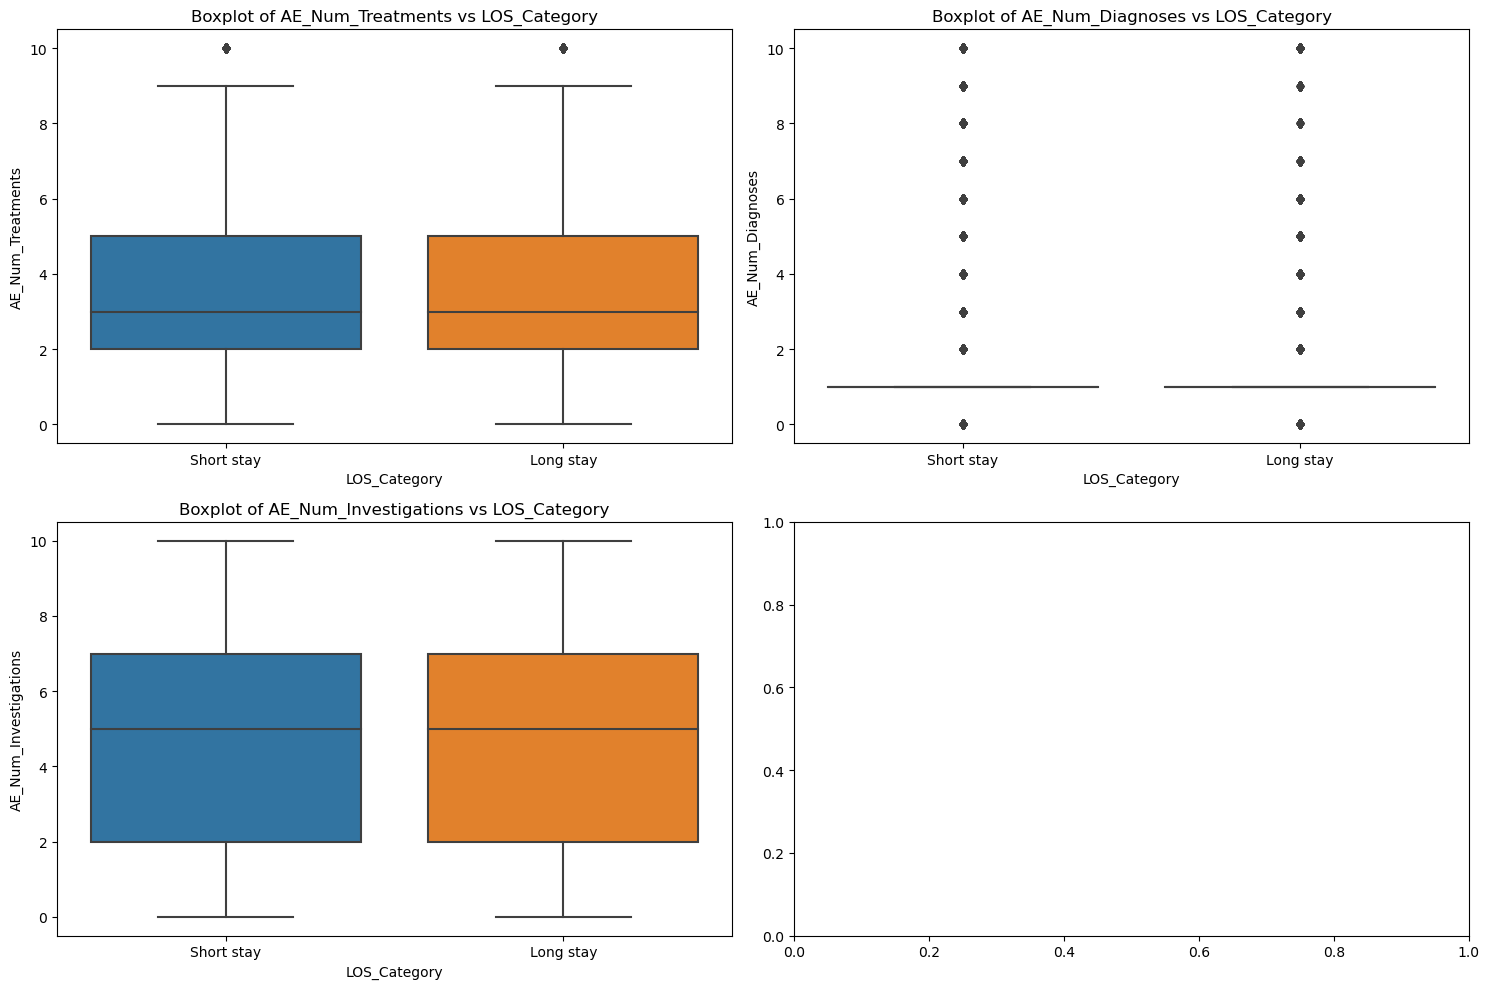

In [26]:
# Assuming your dataframe is named df
variables = ['AE_Num_Treatments',  'AE_Num_Diagnoses', 'AE_Num_Investigations']

# Create a figure and a grid of subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Map each variable to a position in the grid
positions = [(0,0), (0,1), (1,0), (1,1)]

# Loop through each variable and create a boxplot
for var, pos in zip(variables, positions):
    sns.boxplot(x='LOS_Category', y=var, data=df, ax=axes[pos])
    axes[pos].set_title(f'Boxplot of {var} vs LOS_Category')
    axes[pos].set_ylabel(var)
    axes[pos].set_xlabel('LOS_Category')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("summary_plots.png")
plt.show()

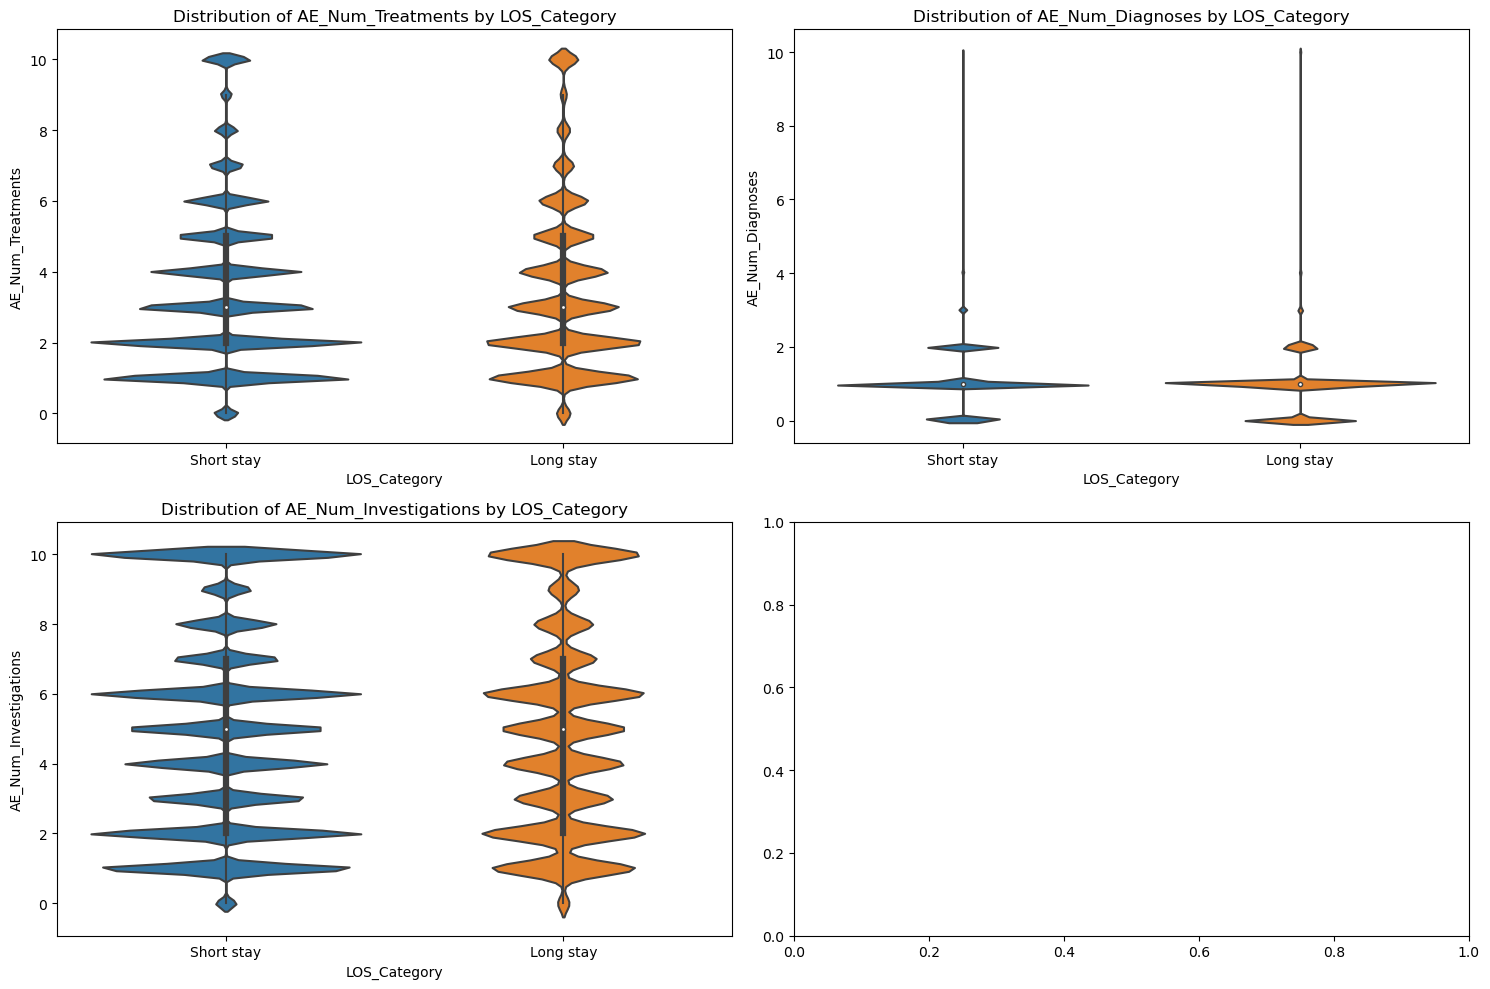

In [31]:
variables = ['AE_Num_Treatments', 'AE_Num_Diagnoses', 'AE_Num_Investigations']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

positions = [(0,0), (0,1), (1,0)]

for var, pos in zip(variables, positions):
    # Example using Violin Plot
    sns.violinplot(x='LOS_Category', y=var, data=df, ax=axes[pos])
    # OR use Box Plot
    # sns.boxplot(x='LOS_Category', y=var, data=df, ax=axes[pos])
    # OR use Swarm Plot (might be slow for large datasets)
    # sns.swarmplot(x='LOS_Category', y=var, data=df, ax=axes[pos])
    axes[pos].set_title(f'Distribution of {var} by LOS_Category')
    axes[pos].set_ylabel(var)
    axes[pos].set_xlabel('LOS_Category')

plt.tight_layout()
plt.savefig("violin_plots.png")
plt.show()


## 4. Arrival Mode & Admission Method

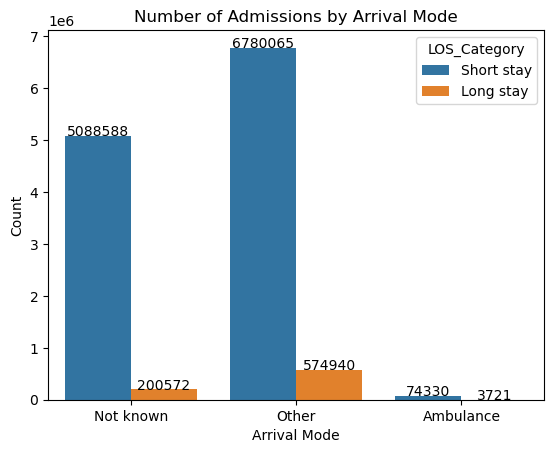

In [40]:
ax = sns.countplot(x='AE_Arrival_Mode', hue='LOS_Category', data=df)

# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")

# Setting the title and labels
ax.set_title('Number of Admissions by Arrival Mode')
ax.set_xlabel('Arrival Mode')
ax.set_ylabel('Count')

# Save the figure
plt.savefig("arrival_mode_plt")
plt.show()


## 5. TFC & ICD-10 Chapter Code 

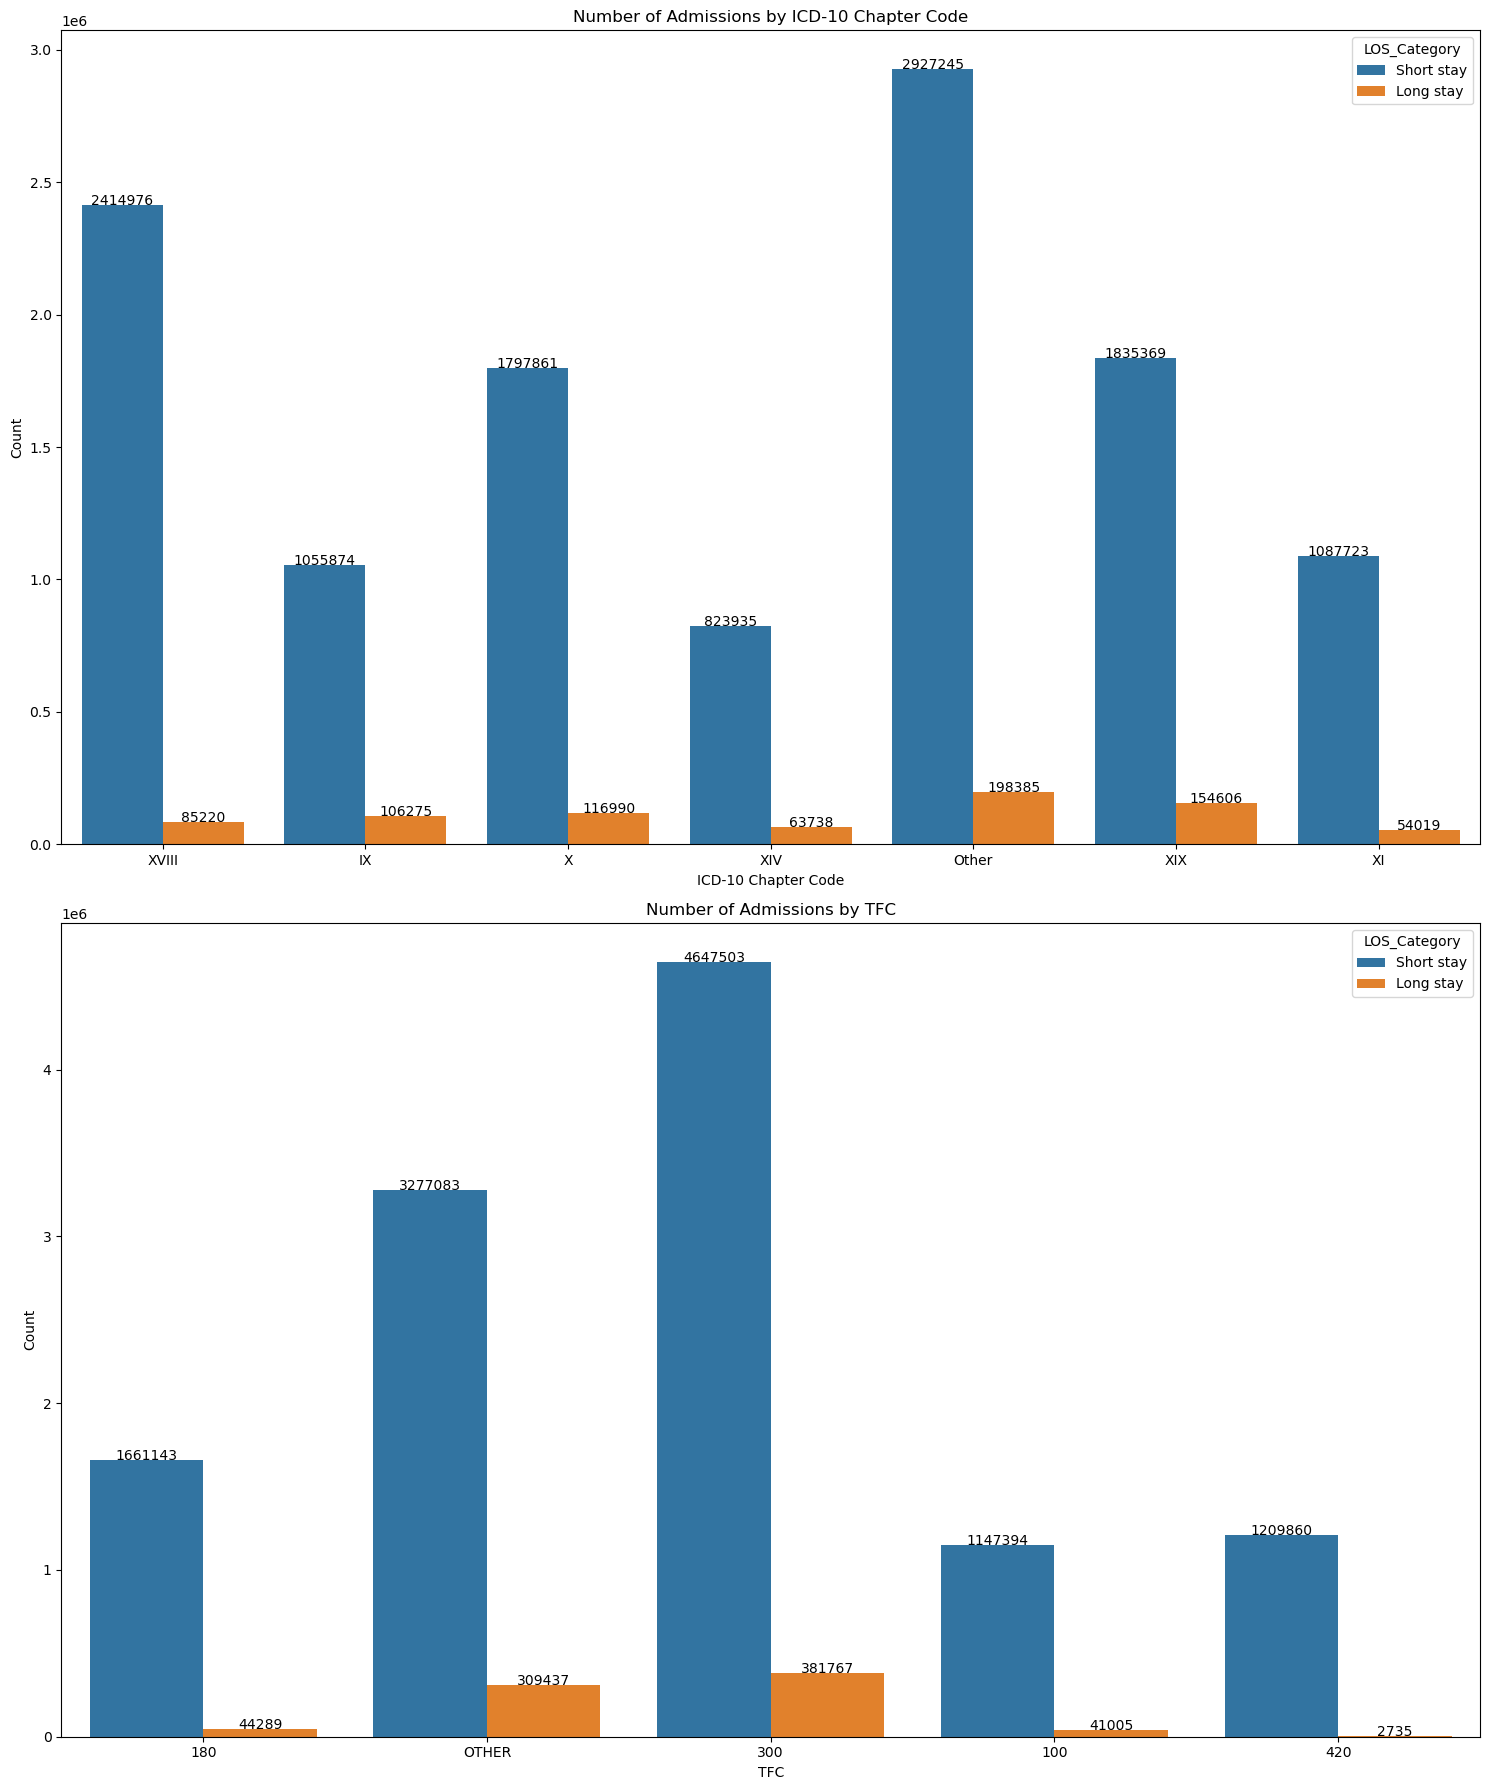

In [33]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 18))

# First plot
ax = sns.countplot(x='ICD10_Chapter_Code', data=df, hue = 'LOS_Category', ax=axes[0])
# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

axes[0].set_title('Number of Admissions by ICD-10 Chapter Code')
axes[0].set_xlabel('ICD-10 Chapter Code')
axes[0].set_ylabel('Count')

# Second plot
ax = sns.countplot(x='TFC', data=df, hue = 'LOS_Category', ax=axes[1])
# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 

axes[1].set_title('Number of Admissions by TFC')
axes[1].set_xlabel('TFC')
axes[1].set_ylabel('Count')

# Display the figure containing the two plots
plt.tight_layout()
plt.savefig("figuress.png")
plt.show()


## 6. HRG

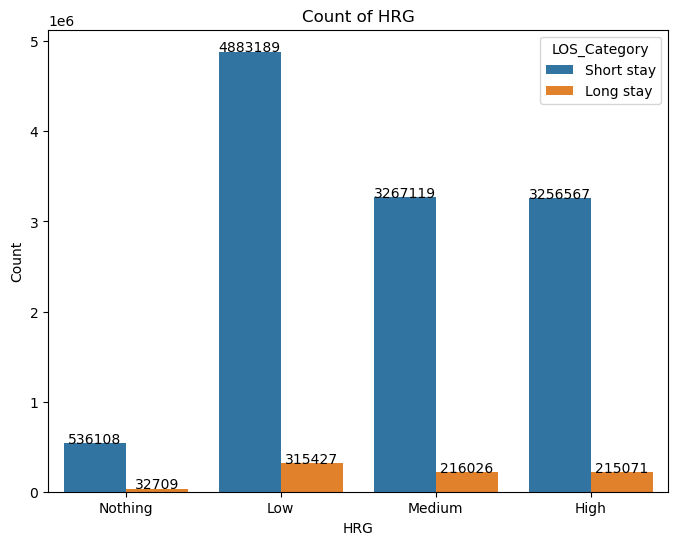

In [34]:
labels = ['Nothing', 'Low', 'Medium', 'High']

# Plot a barchart
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='AE_HRG', data=df, hue = 'LOS_Category', order = labels)
# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
    
plt.title('Count of HRG')
plt.xlabel('HRG')
plt.ylabel('Count')
plt.show()

## 7. A&E Time (Mins)

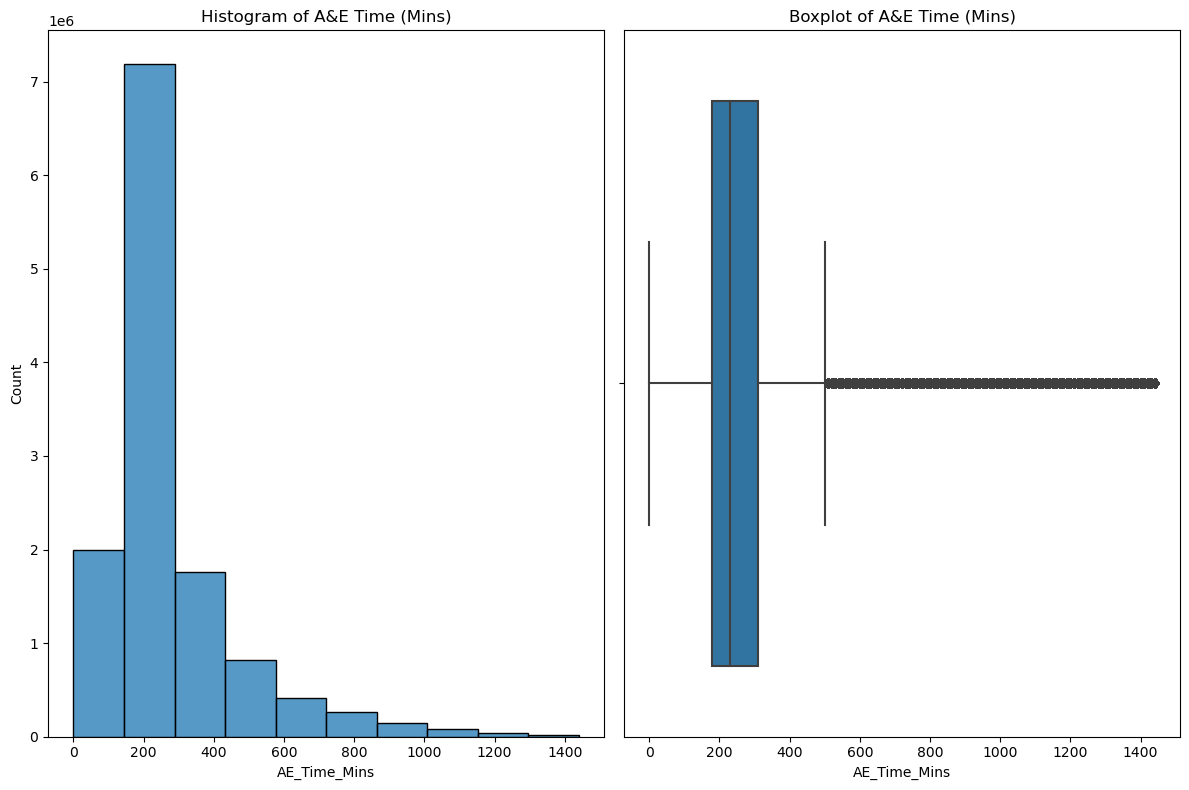

In [35]:
# Create a figure and a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot a histogram and a boxplot for the variable: AE_Time_Mins
sns.histplot(df['AE_Time_Mins'], ax=axes[0], bins=10)
sns.boxplot(x=df['AE_Time_Mins'], ax=axes[1])

# Add titles to the subplots
axes[0].set_title('Histogram of A&E Time (Mins)')
axes[1].set_title('Boxplot of A&E Time (Mins)')

# Display the figure containing the two plots
plt.tight_layout()
plt.savefig("figure2.png")
plt.show()


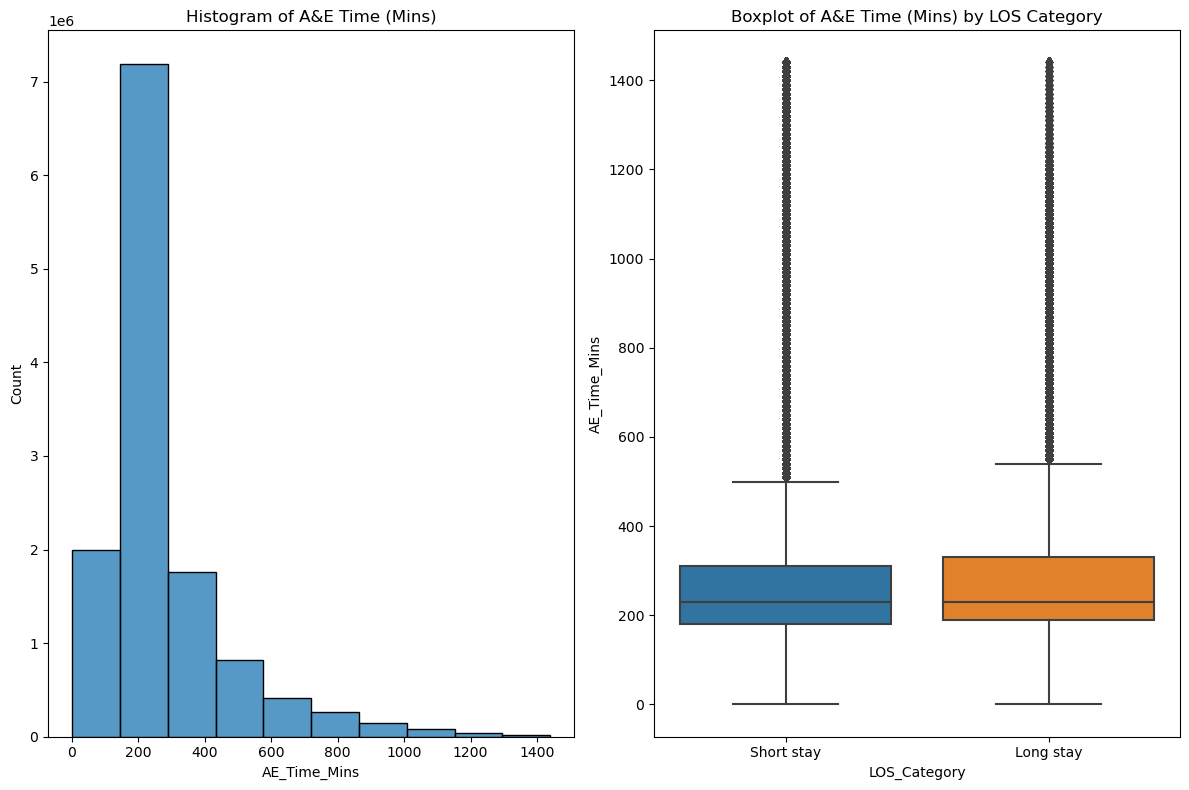

In [36]:
# Create a figure and a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot a histogram for the variable: AE_Time_Mins
sns.histplot(df['AE_Time_Mins'], ax=axes[0], bins=10)
# Boxplot for AE_Time_Mins based on different categories of LOS
sns.boxplot(x='LOS_Category', y='AE_Time_Mins', data=df, ax=axes[1])

# Add titles to the subplots
axes[0].set_title('Histogram of A&E Time (Mins)')
axes[1].set_title('Boxplot of A&E Time (Mins) by LOS Category')

# Display the figure containing the two plots
plt.tight_layout()
plt.savefig("figure3.png")
plt.show()

## 8. Dependent Variable: LOS

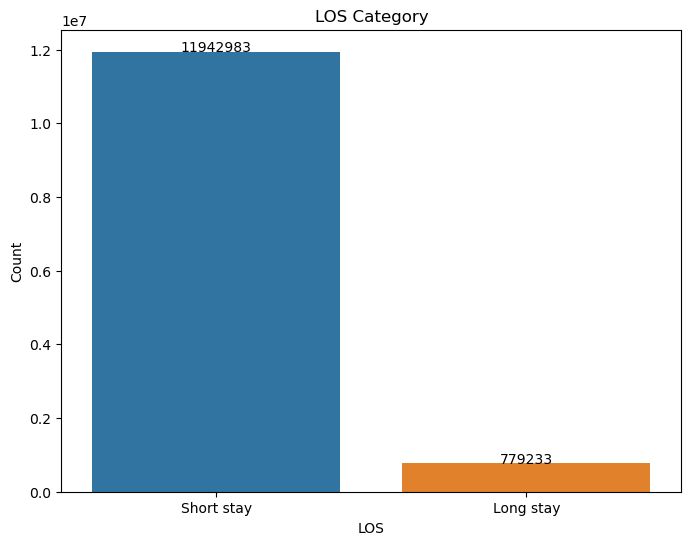

In [38]:

# Plot a barchart
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='LOS_Category', data=df)
# Add count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center") 
    
plt.title('LOS Category')
plt.xlabel('LOS')
plt.ylabel('Count')
plt.savefig("LOS.png")
plt.show()

In [ ]:
length_of_stay = data['Length_Of_Stay_Days']

# Create a figure and a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot a histogram and a boxplot for the variable: AE_Time_Mins
sns.histplot(length_of_stay, ax=axes[0], bins=30, kde = 30)
sns.boxplot(x=length_of_stay, ax=axes[1])

# Add titles to the subplots
axes[0].set_title('Histogram of Length of Stay')
axes[1].set_title('Boxplot of Length of Stay')

# Display the figure containing the two plots
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("LOS2.png")
plt.show()


